In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Data Cleaning & Data prepping

In [2]:
df = pd.read_csv("mxmh_survey_results.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [3]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [4]:
# Create a copy of the original DataFrame
df_clean = df.copy()

# Remove unwanted columns
df_clean.drop(['Primary streaming service', 'Permissions', 'Timestamp','Instrumentalist', 'Composer', 'While working', 'Exploratory','Foreign languages','OCD'], axis=1, inplace=True)

# Remove rows with any missing values
df_clean.dropna(inplace=True)

# Display the first few rows of the cleaned data
df_clean
#Create copoy of df. One DF is encoded (df_clean)and the other is unencoded (df_unencoded)
df_unencoded = df_clean #df_unencoded is a copy of df_clean before the encoding process
df_unencoded

,Age,Hours per day,Fav genre,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,Music effects
2,18.0,4.0,Video game music,132.0,Never,Never,Very frequently,Never,Never,Rarely,...,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,No effect
3,61.0,2.5,Jazz,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,...,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,Improve
4,18.0,4.0,R&B,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,...,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,Improve
5,18.0,5.0,Jazz,86.0,Rarely,Sometimes,Never,Never,Never,Sometimes,...,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,Improve
6,18.0,3.0,Video game music,66.0,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,...,Rarely,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,2.0,Rock,120.0,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,...,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,Improve
732,18.0,1.0,Pop,160.0,Rarely,Rarely,Never,Never,Never,Never,...,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,Improve
733,19.0,6.0,Rap,120.0,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,...,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,Improve
734,19.0,5.0,Classical,170.0,Very frequently,Never,Never,Never,Never,Never,...,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,Improve


In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 2 to 735
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           624 non-null    float64
 1   Hours per day                 624 non-null    float64
 2   Fav genre                     624 non-null    object 
 3   BPM                           624 non-null    float64
 4   Frequency [Classical]         624 non-null    object 
 5   Frequency [Country]           624 non-null    object 
 6   Frequency [EDM]               624 non-null    object 
 7   Frequency [Folk]              624 non-null    object 
 8   Frequency [Gospel]            624 non-null    object 
 9   Frequency [Hip hop]           624 non-null    object 
 10  Frequency [Jazz]              624 non-null    object 
 11  Frequency [K pop]             624 non-null    object 
 12  Frequency [Latin]             624 non-null    object 
 13  Frequ

In [6]:
#restrict data using age: 18-30
df_clean = df_clean[(df_clean['Age'] >= 18) & (df_clean['Age'] <= 30)]
df_clean.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,21.774457,3.690761,122.489130,6.048913,5.114130,3.671196
std,3.446073,2.816818,33.749113,2.682631,2.927464,3.004635
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,2.000000,98.000000,4.000000,2.750000,1.000000
50%,21.000000,3.000000,120.000000,7.000000,6.000000,3.000000
75%,24.000000,5.000000,145.000000,8.000000,7.000000,6.000000
max,30.000000,18.000000,220.000000,10.000000,10.000000,10.000000


In [7]:
df_clean['Fav genre'].value_counts()

Rock                78
Pop                 59
Metal               49
EDM                 26
R&B                 23
Video game music    22
Hip hop             19
Classical           15
K pop               15
Folk                15
Country             14
Jazz                13
Rap                 12
Lofi                 6
Gospel               1
Latin                1
Name: Fav genre, dtype: int64

Checking distribution of Music Effects, Distribution is very skewed towards Improve.
'No Effect' and 'Worsen' can be combined into 'Worsen' to mitigate some of this

In [8]:
# Check Counts and Relative Frequency of Values for a feature
df_clean['Music effects'].value_counts(normalize=True)
print(df_unencoded['Music effects'].value_counts())
print("\n")

#combine no effect and worsen to worsen
df_clean['Music effects'] = df_clean['Music effects'].replace(['No effect', 'Worsen'], 'Worsen')
#assign 1 to improve and 0 to worsen
df_clean['Music effects'] = df_clean['Music effects'].replace({'Improve': 1, 'Worsen': 0})
df_clean

Improve      471
No effect    138
Worsen        15
Name: Music effects, dtype: int64


/tmp/ipykernel_926/582382214.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Music effects'] = df_clean['Music effects'].replace(['No effect', 'Worsen'], 'Worsen')
/tmp/ipykernel_926/582382214.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Music effects'] = df_clean['Music effects'].replace({'Improve': 1, 'Worsen': 0})


,Age,Hours per day,Fav genre,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,Music effects
2,18.0,4.0,Video game music,132.0,Never,Never,Very frequently,Never,Never,Rarely,...,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,0
4,18.0,4.0,R&B,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,...,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,1
5,18.0,5.0,Jazz,86.0,Rarely,Sometimes,Never,Never,Never,Sometimes,...,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,1
6,18.0,3.0,Video game music,66.0,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,...,Rarely,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,1
7,21.0,1.0,K pop,95.0,Never,Never,Rarely,Never,Never,Very frequently,...,Never,Sometimes,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,21.0,2.0,R&B,147.0,Sometimes,Never,Sometimes,Rarely,Never,Never,...,Rarely,Sometimes,Very frequently,Sometimes,Sometimes,Sometimes,7.0,6.0,4.0,1
732,18.0,1.0,Pop,160.0,Rarely,Rarely,Never,Never,Never,Never,...,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,1
733,19.0,6.0,Rap,120.0,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,...,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,1
734,19.0,5.0,Classical,170.0,Very frequently,Never,Never,Never,Never,Never,...,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1


In [9]:
# Use loc to keep rows where BPM is not 0
df_clean = df_clean.loc[df_clean['BPM'] != 0]
df_clean

,Age,Hours per day,Fav genre,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,Music effects
2,18.0,4.0,Video game music,132.0,Never,Never,Very frequently,Never,Never,Rarely,...,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,0
4,18.0,4.0,R&B,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,...,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,1
5,18.0,5.0,Jazz,86.0,Rarely,Sometimes,Never,Never,Never,Sometimes,...,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,1
6,18.0,3.0,Video game music,66.0,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,...,Rarely,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,1
7,21.0,1.0,K pop,95.0,Never,Never,Rarely,Never,Never,Very frequently,...,Never,Sometimes,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,21.0,2.0,R&B,147.0,Sometimes,Never,Sometimes,Rarely,Never,Never,...,Rarely,Sometimes,Very frequently,Sometimes,Sometimes,Sometimes,7.0,6.0,4.0,1
732,18.0,1.0,Pop,160.0,Rarely,Rarely,Never,Never,Never,Never,...,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,1
733,19.0,6.0,Rap,120.0,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,...,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,1
734,19.0,5.0,Classical,170.0,Very frequently,Never,Never,Never,Never,Never,...,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1


Exploratory Analysis

Statistical Summary

In [10]:
#Box plot and data distribution

#cleaning of data
df_clean_numeric = df_clean[['Age', 'Hours per day', 'BPM']]
df_clean_numeric.describe()

,Age,Hours per day,BPM
count,366.000000,366.000000,366.000000
mean,21.734973,3.702732,123.158470
std,3.412825,2.817653,32.597286
min,18.000000,0.500000,20.000000
25%,19.000000,2.000000,99.000000
50%,21.000000,3.000000,120.000000
75%,24.000000,5.000000,145.000000
max,30.000000,18.000000,220.000000


Exploratory Analysis via comparing variables and their relationships

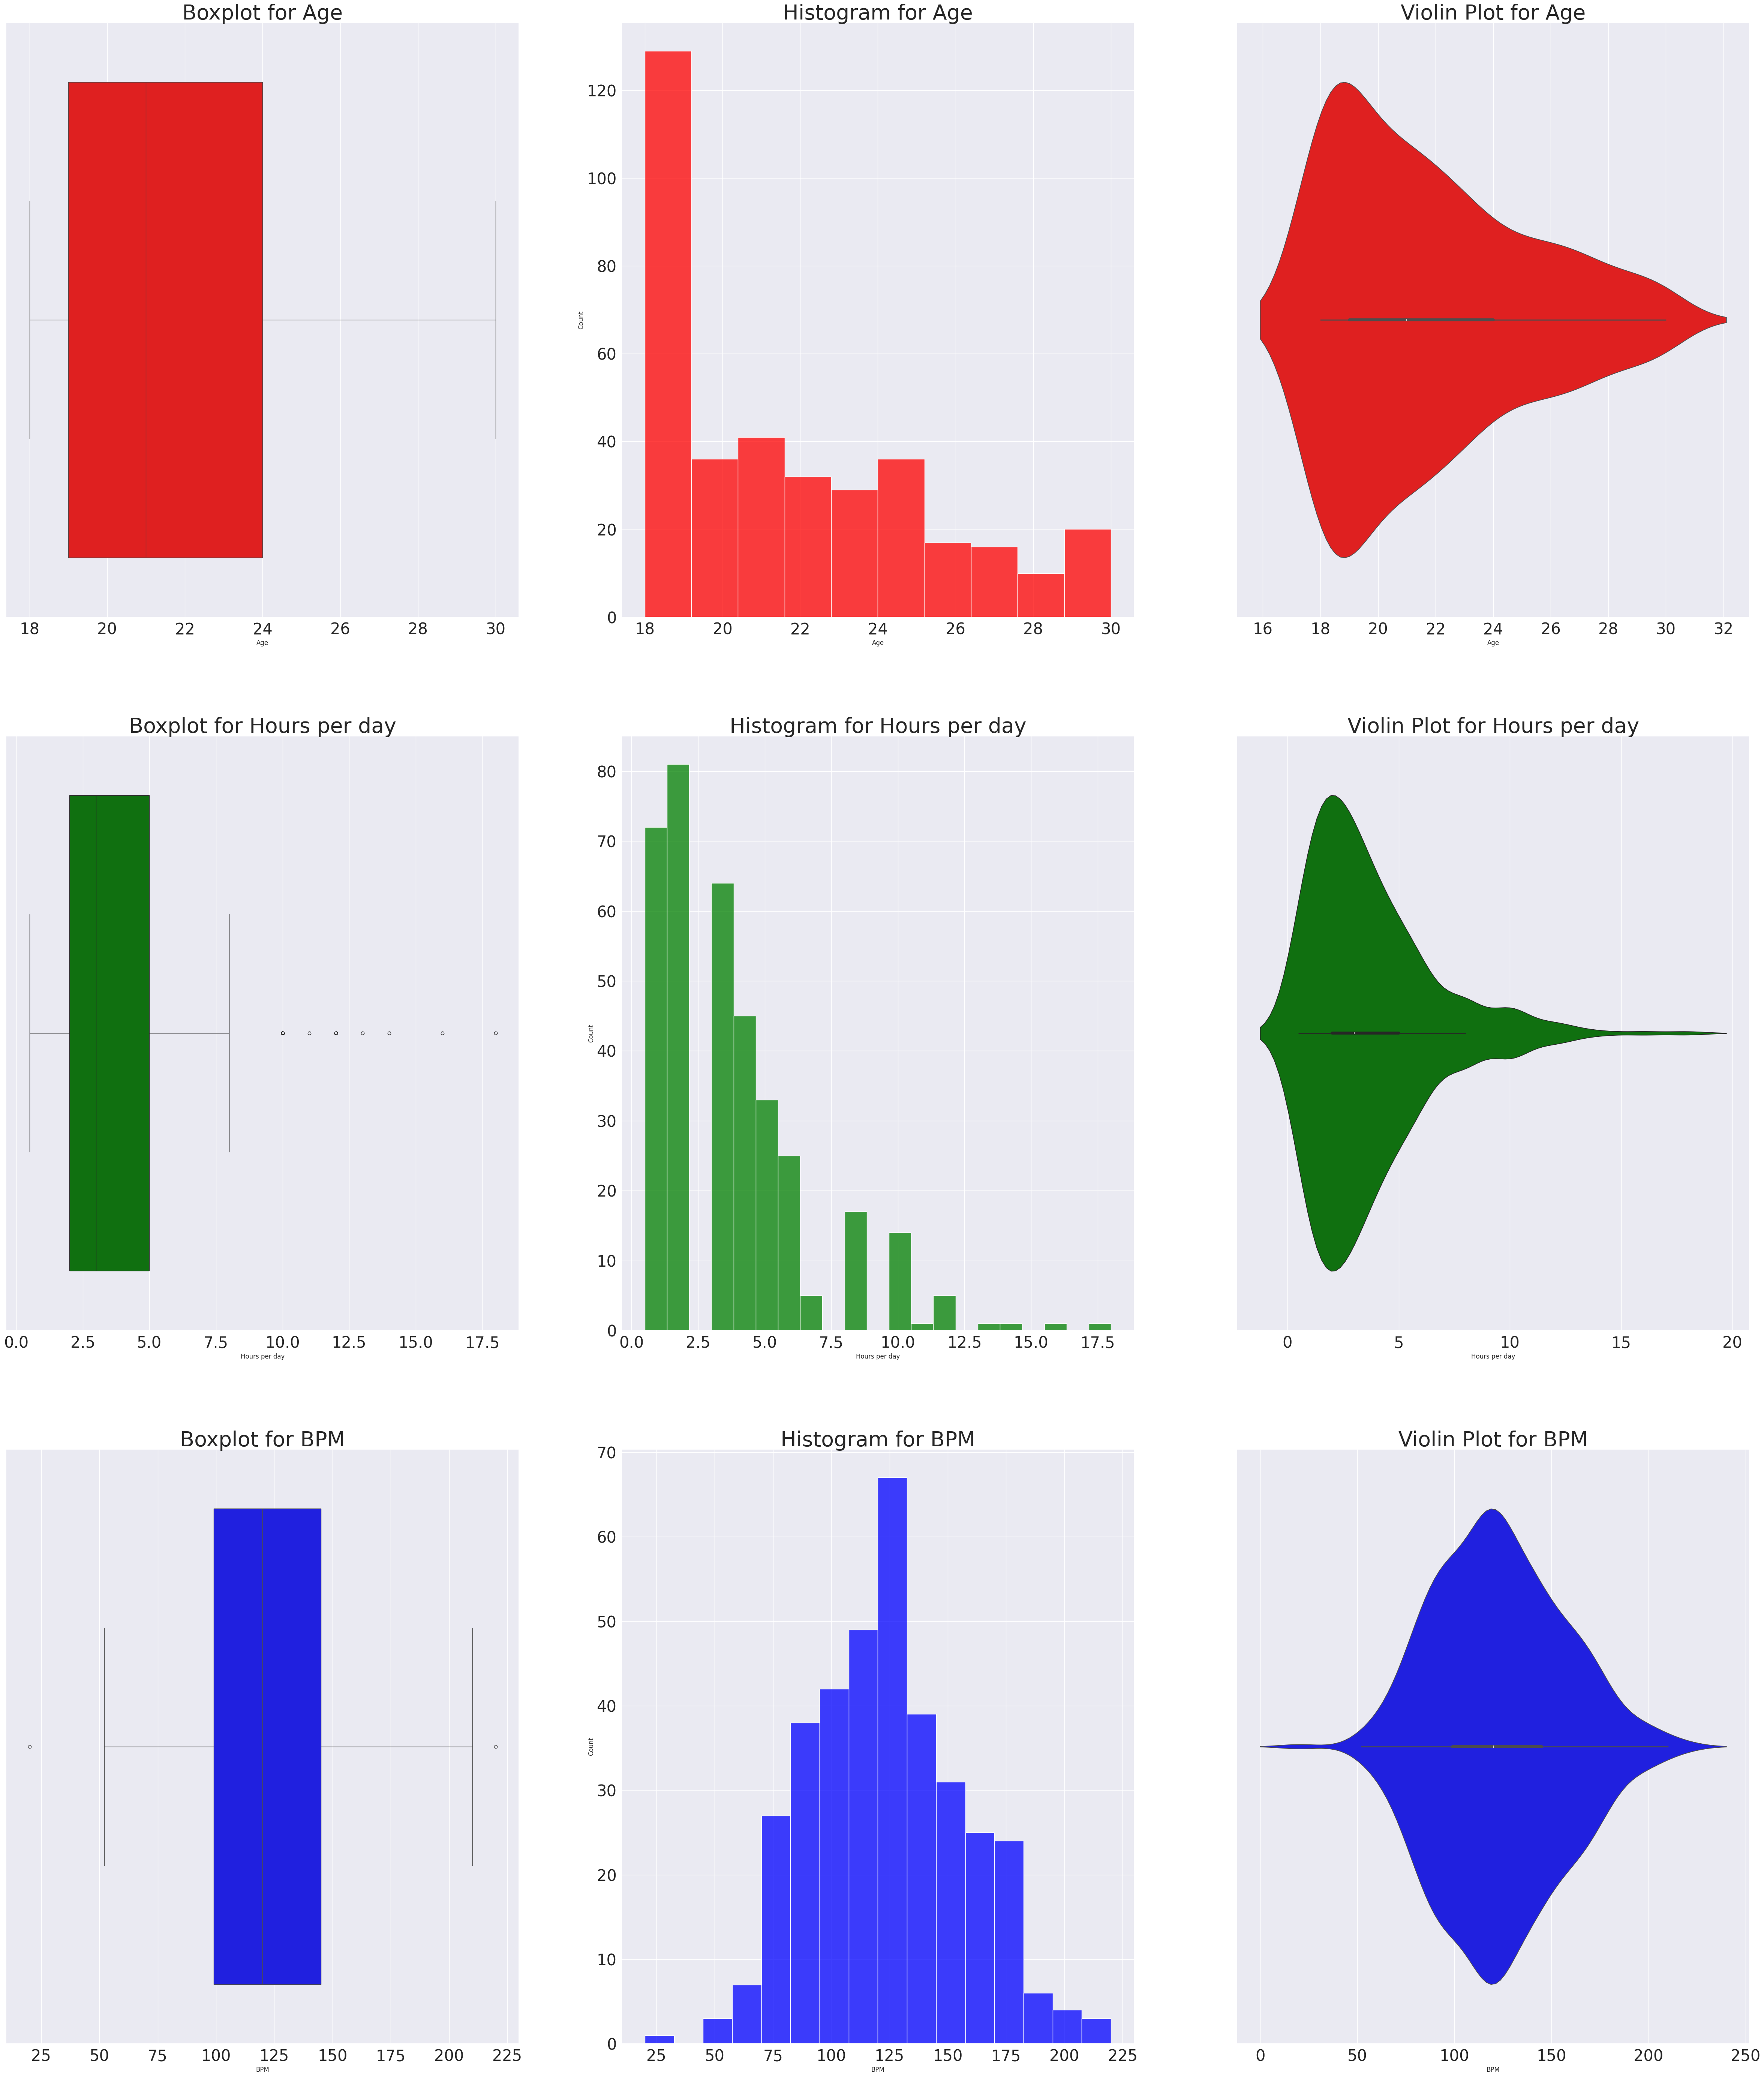

In [11]:
#Draw the distributions of all variables

f, axes = plt.subplots(3, 3, figsize=(60, 70))
colors = ['red', 'green', 'blue']

count = 0
for var in df_clean_numeric:
    sb.boxplot(df_clean_numeric[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(df_clean_numeric[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(df_clean_numeric[var], orient = "h", color = colors[count], ax = axes[count,2])

    # Adjust font size for x-axis and y-axis labels
    plt.setp(axes[count, 0].get_xticklabels(), fontsize=30)
    plt.setp(axes[count, 0].get_yticklabels(), fontsize=30)

    plt.setp(axes[count, 1].get_xticklabels(), fontsize=30)
    plt.setp(axes[count, 1].get_yticklabels(), fontsize=30)

    plt.setp(axes[count, 2].get_xticklabels(), fontsize=30)
    plt.setp(axes[count, 2].get_yticklabels(), fontsize=30)
    
    axes[count, 0].set_title(f"Boxplot for {var}", fontsize=40)
    axes[count, 1].set_title(f"Histogram for {var}", fontsize=40)
    axes[count, 2].set_title(f"Violin Plot for {var}", fontsize=40)

    count += 1

Rarely             133
Sometimes          108
Never               88
Very frequently     37
Name: Frequency [Classical], dtype: int64
Never              167
Rarely             118
Sometimes           50
Very frequently     31
Name: Frequency [Country], dtype: int64
Never              135
Rarely              99
Sometimes           73
Very frequently     59
Name: Frequency [EDM], dtype: int64
Never              141
Rarely             109
Sometimes           73
Very frequently     43
Name: Frequency [Folk], dtype: int64
Never              266
Rarely              71
Sometimes           23
Very frequently      6
Name: Frequency [Gospel], dtype: int64
Sometimes          117
Rarely             108
Never               74
Very frequently     67
Name: Frequency [Hip hop], dtype: int64
Never              130
Rarely             120
Sometimes           88
Very frequently     28
Name: Frequency [Jazz], dtype: int64
Never              204
Rarely              83
Very frequently     45
Sometimes       

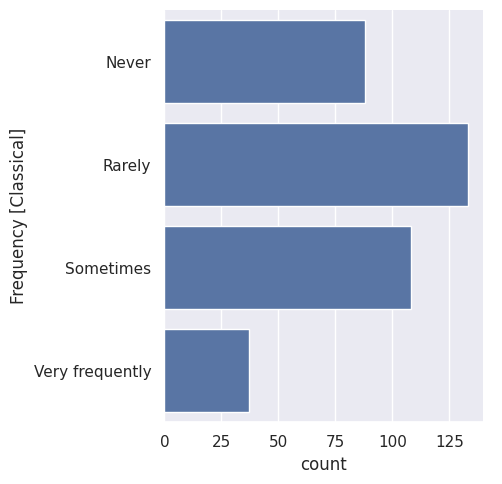

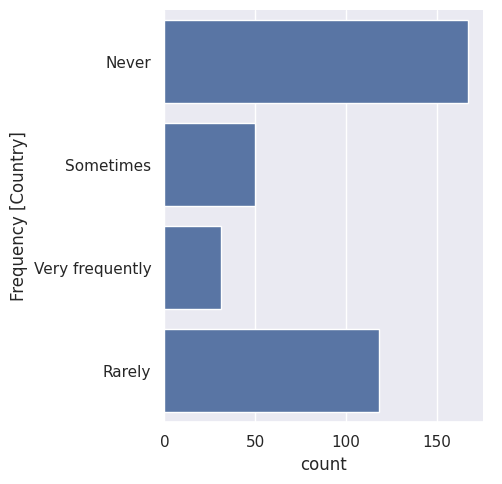

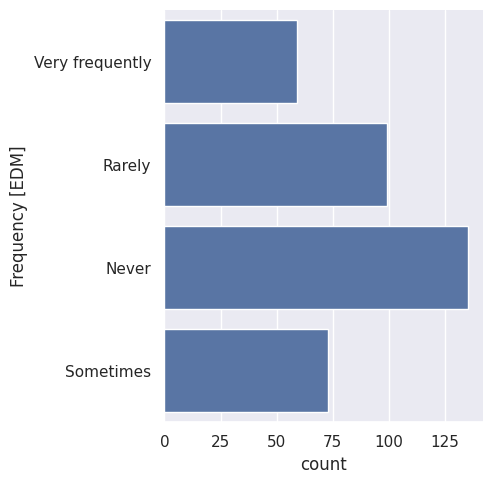

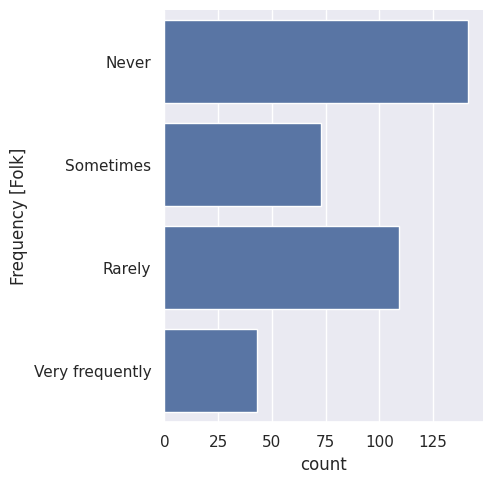

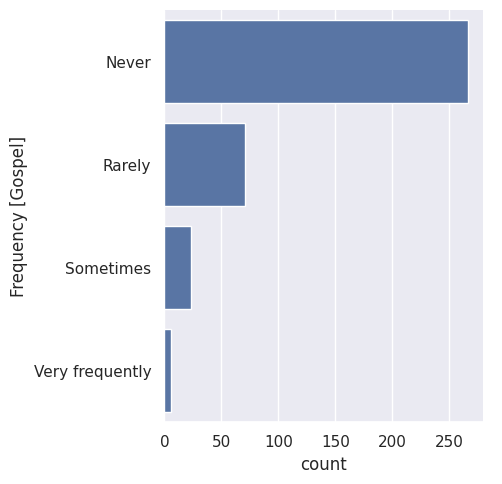

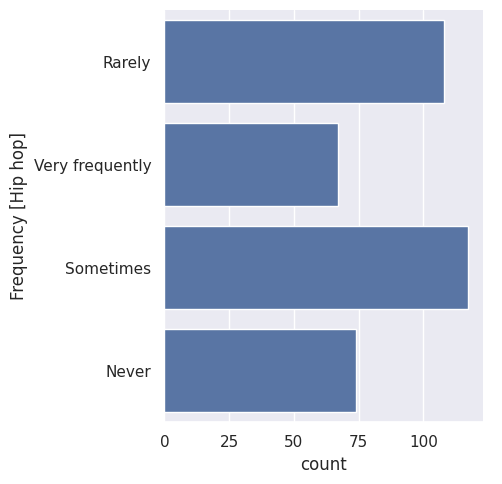

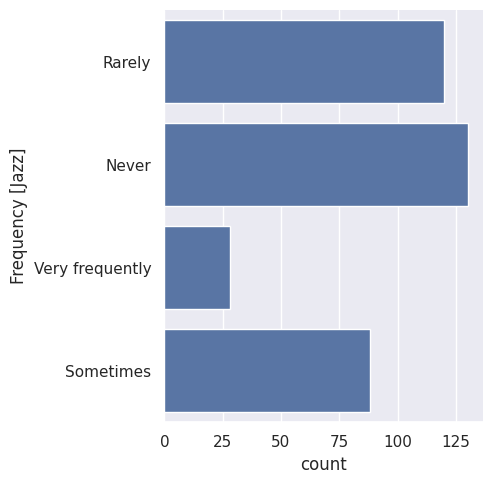

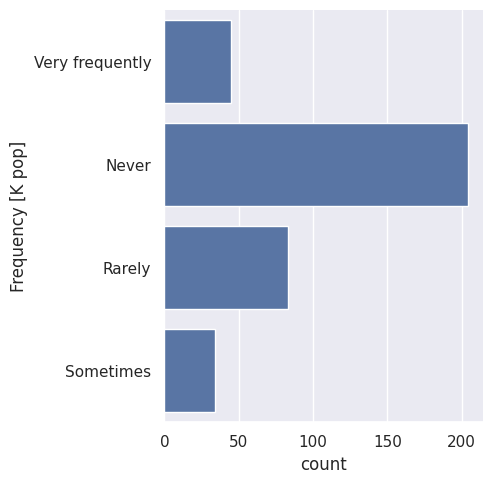

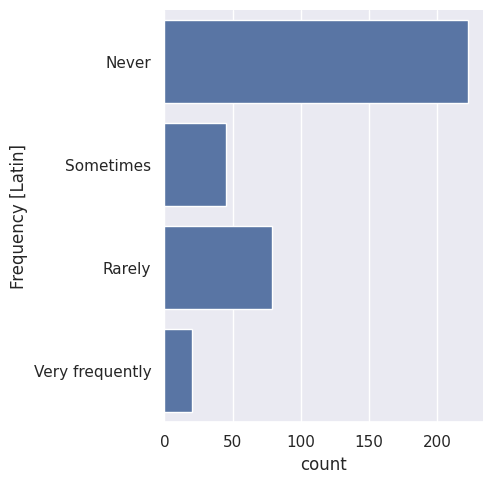

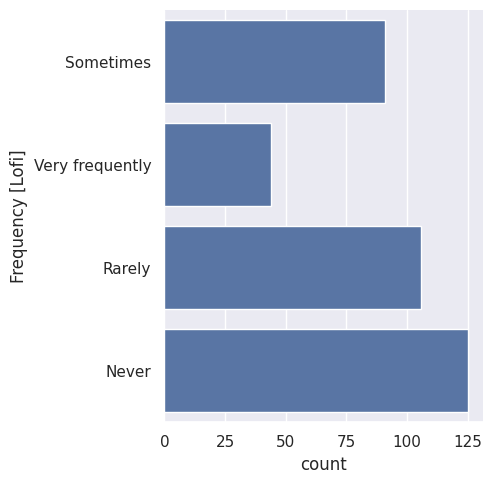

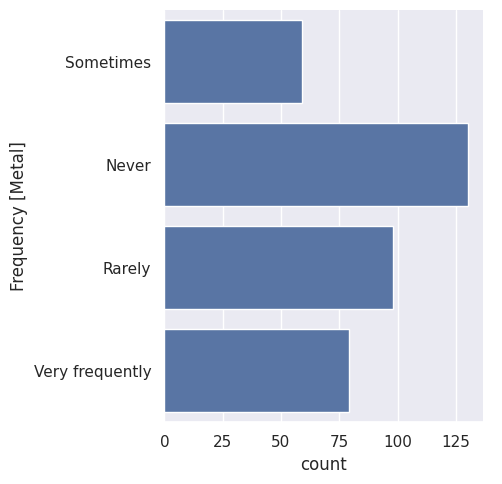

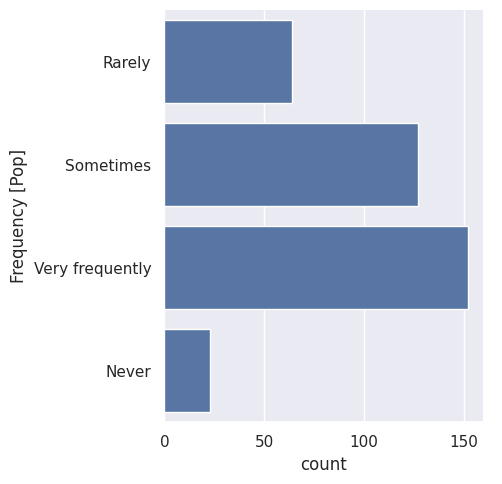

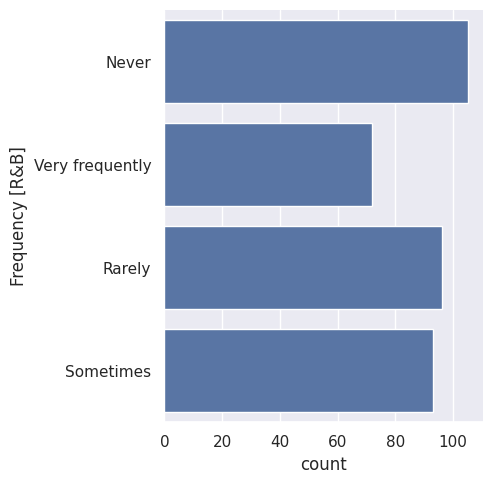

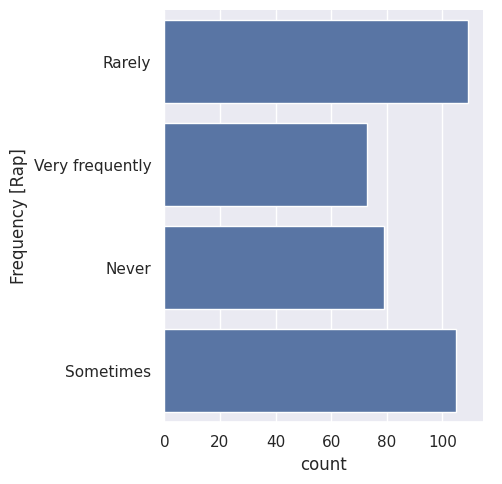

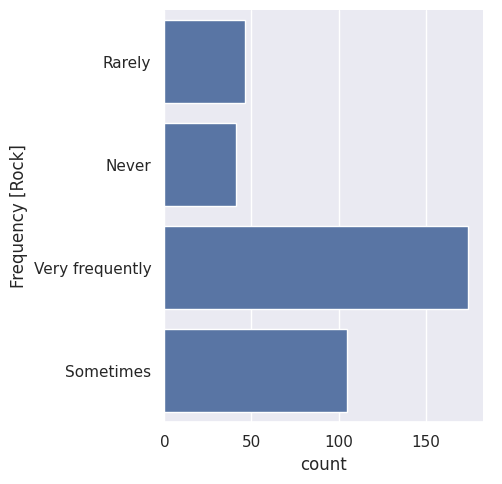

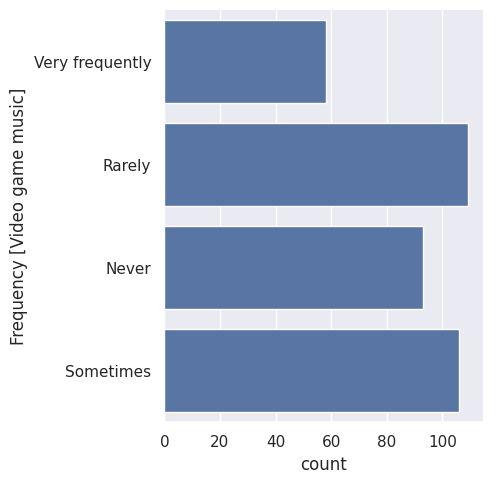

In [12]:
# frequency of music effects
df_clean_freq = df_clean
df_clean_freq = df_clean_freq.drop(['Age','Hours per day','BPM','Music effects','Anxiety','Depression','Insomnia','Fav genre'], axis = 1)
df_clean_freq
count=0

for var in df_clean_freq:
    print(df_clean_freq[var].value_counts())
    sb.catplot(y =var, data = df_clean_freq, kind = "count",)
    count+=1

# trying for the box plot:
#print(df_clean_freq["Frequency [Classical]"].value_counts())
#sb.catplot(y = "Frequency [Classical]", data = df_clean_freq, kind = "count")


In [13]:
df_unencoded

,Age,Hours per day,Fav genre,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,Music effects
2,18.0,4.0,Video game music,132.0,Never,Never,Very frequently,Never,Never,Rarely,...,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,No effect
3,61.0,2.5,Jazz,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,...,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,Improve
4,18.0,4.0,R&B,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,...,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,Improve
5,18.0,5.0,Jazz,86.0,Rarely,Sometimes,Never,Never,Never,Sometimes,...,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,Improve
6,18.0,3.0,Video game music,66.0,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,...,Rarely,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,2.0,Rock,120.0,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,...,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,Improve
732,18.0,1.0,Pop,160.0,Rarely,Rarely,Never,Never,Never,Never,...,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,Improve
733,19.0,6.0,Rap,120.0,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,...,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,Improve
734,19.0,5.0,Classical,170.0,Very frequently,Never,Never,Never,Never,Never,...,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,Improve


<AxesSubplot: xlabel='BPM', ylabel='Music effects'>

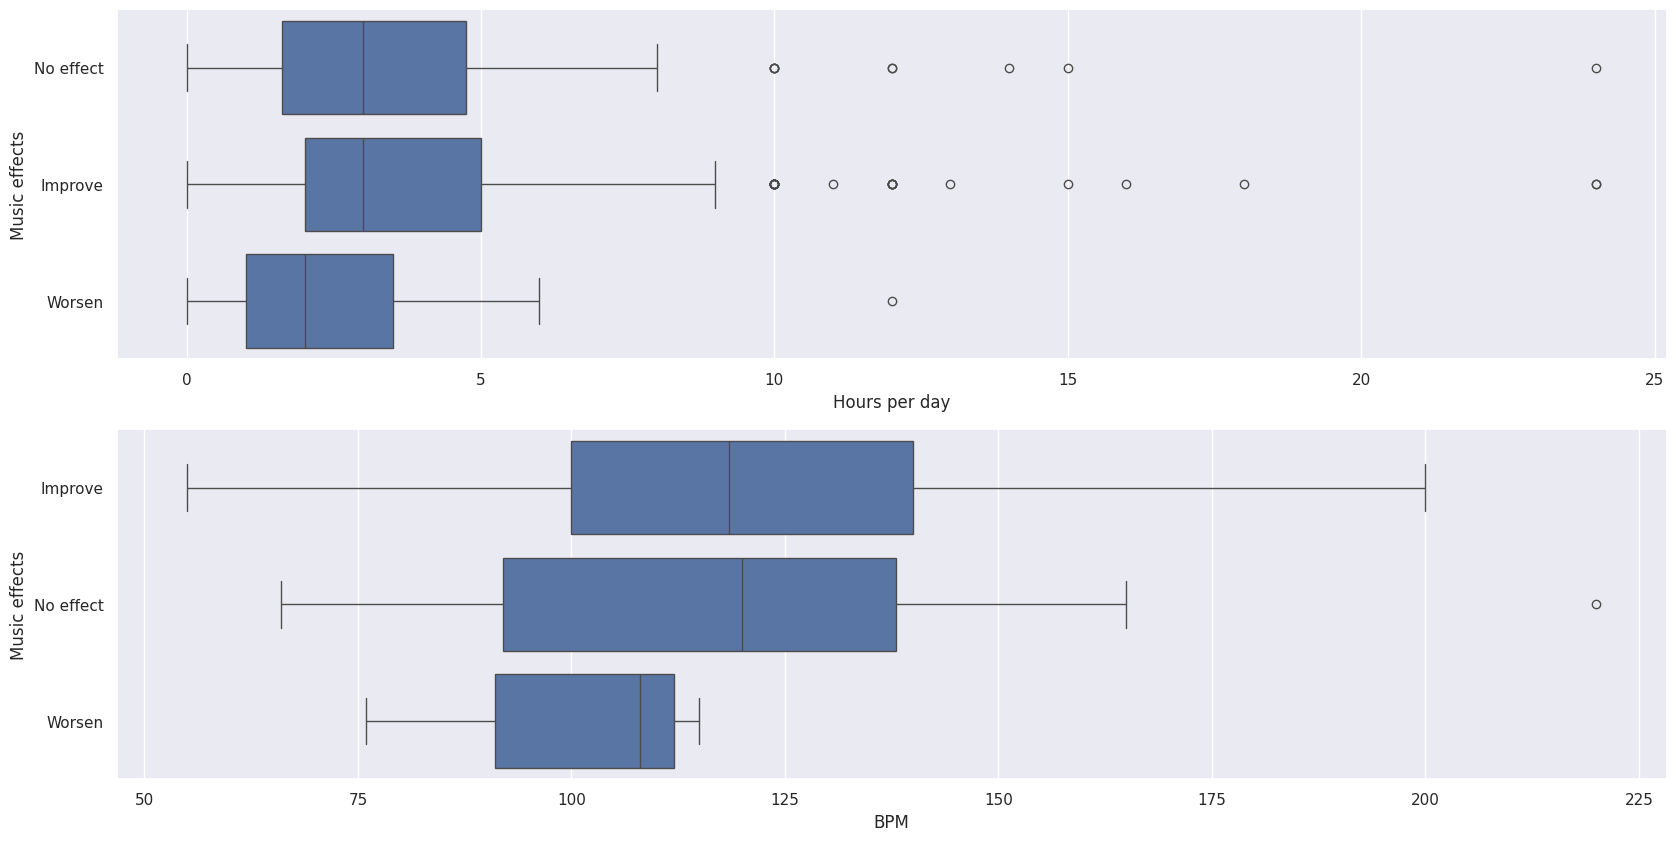

In [14]:
#Possilbe box plot of cat against numerical 
#Y= cat(Music effect & big 3)
#X= Numerical (hours & bpm)

#df_unencoded
df_subset = df_unencoded.sample(100)  # Grab 10 random rows


f, axes = plt.subplots(2, 1, figsize=(20, 10))
sb.boxplot(x = 'Hours per day', y = 'Music effects', data = df_unencoded, ax = axes[0])
sb.boxplot(x = 'BPM', y = 'Music effects', data = df_subset, ax = axes[1])


In [15]:
#Encode the frequencies and assign the value to the never, rarely, sometimes, very frequently, always
df_clean_freq_encoded = df_clean
df_clean_freq_encoded = df_clean_freq_encoded.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'], [0, 1, 2, 3])
df_clean_freq_encoded = df_clean_freq_encoded.drop(['Age','Anxiety','Depression','Insomnia'], axis = 1)
df_clean_freq_encoded
df_tree = df_clean_freq_encoded

<AxesSubplot: >

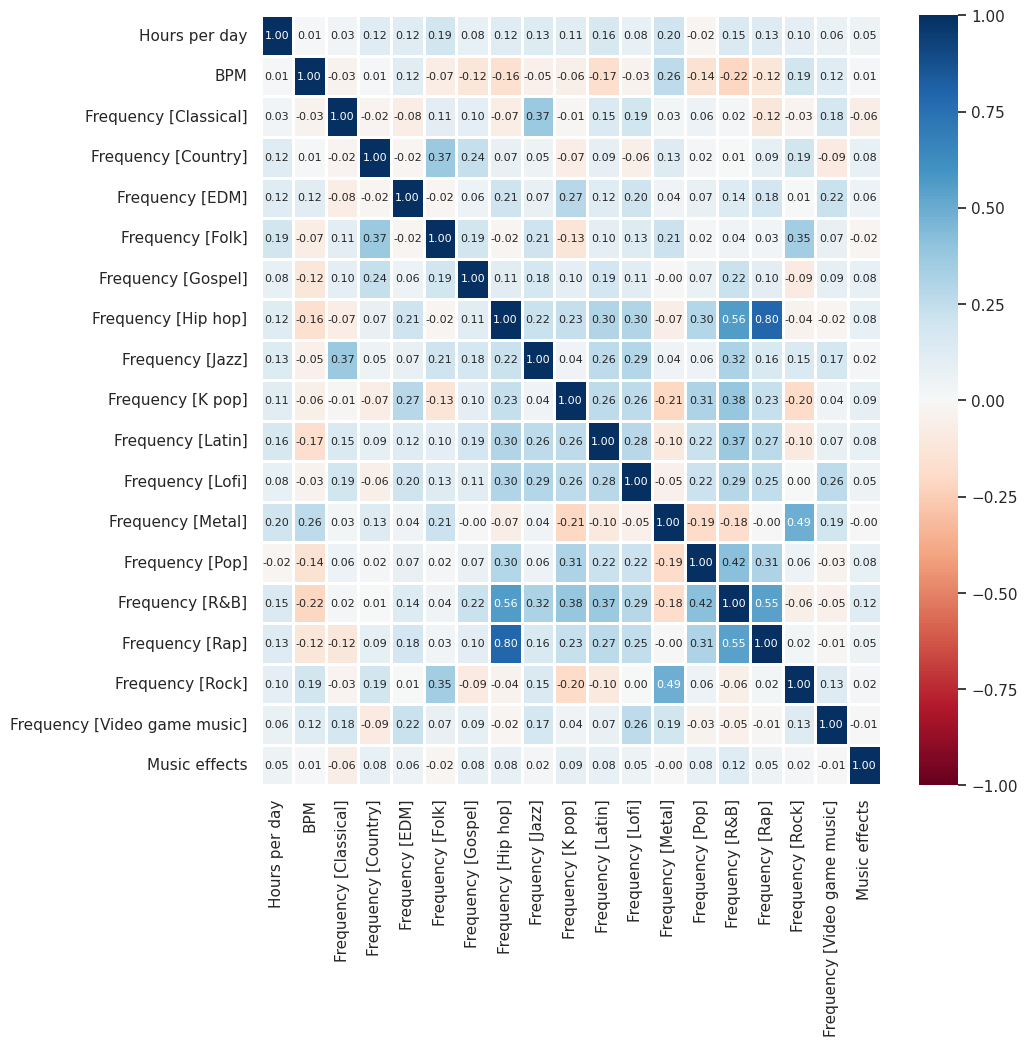

In [16]:

# Correlation Matrix
#df_clean_new= df_clean[['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia','Music effects']]
#print(df_clean_new.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(df_clean_freq_encoded.corr(), vmin = -1, vmax = 1,  linewidths = 2,
           annot = True, fmt = ".2f", annot_kws = {"size": 8}, cmap = "RdBu")

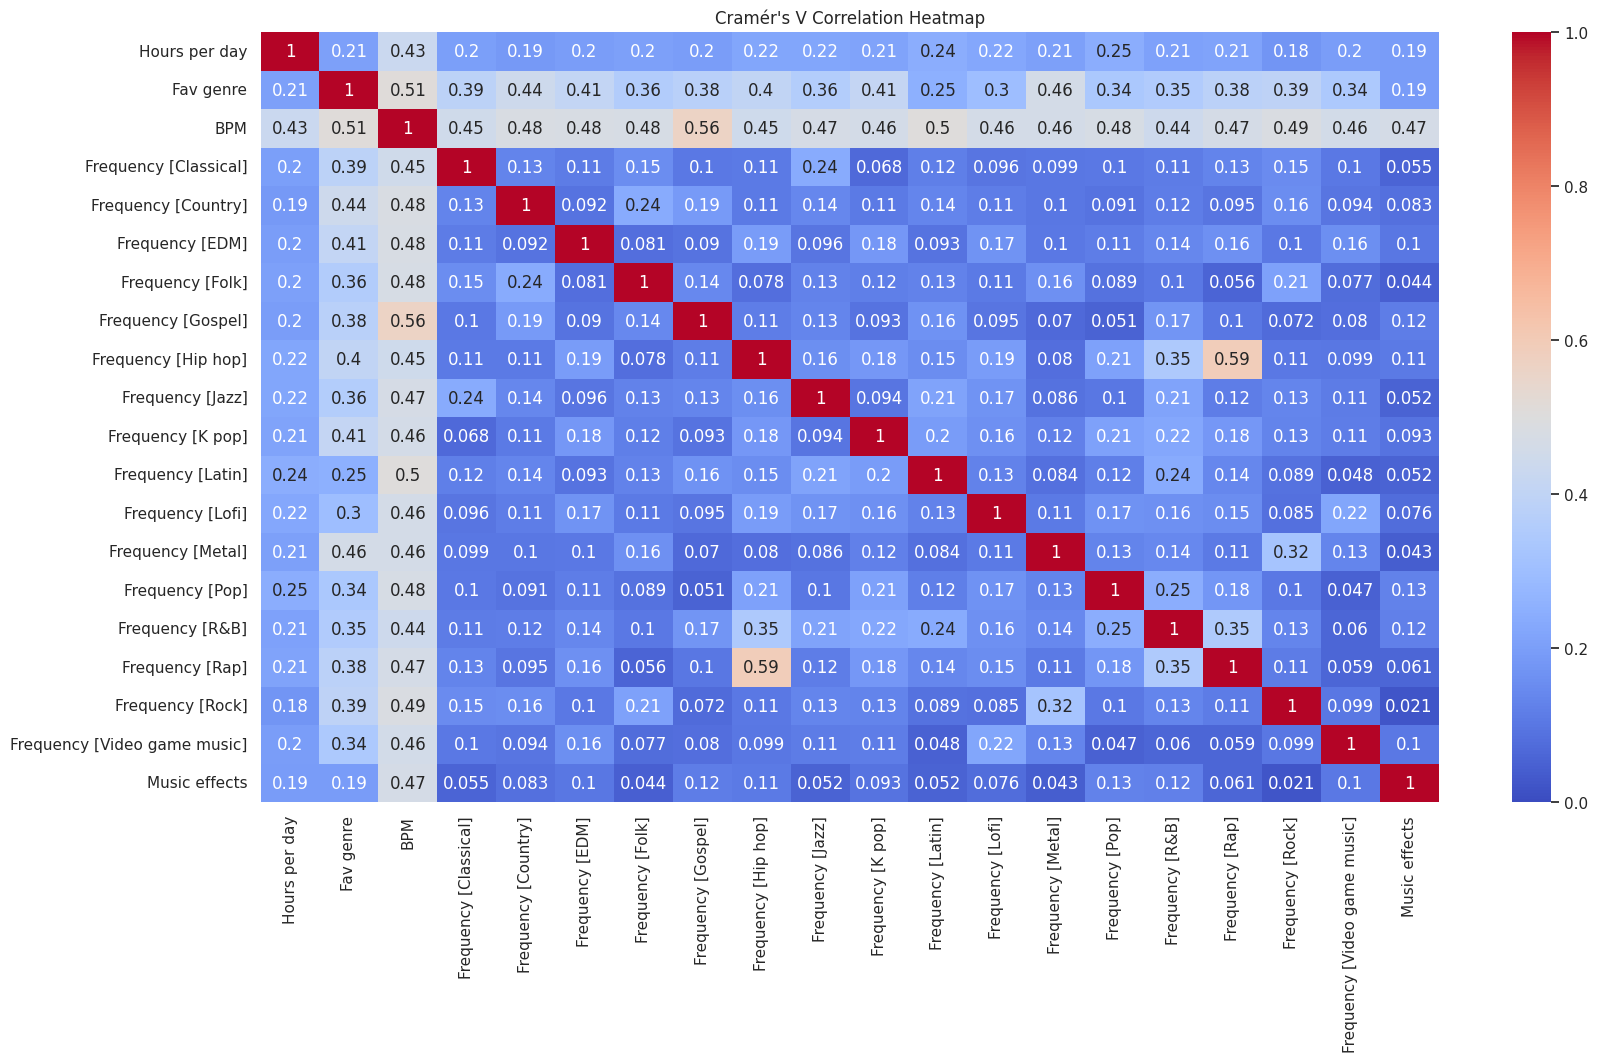

In [17]:
# Due to the lack of insightful data analysis from normal corr heatmap with encoded data
# We'll try for different approach with Cramér's V

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


# Function to calculate Cramér's V between two variables
def cramers_v(var1, var2):
    contingency_table = pd.crosstab(var1, var2)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))


# Create a copy of the original DataFrame
df_unencoded_new = df_unencoded
df_unencoded_new = df_unencoded_new.drop(['Age','Anxiety','Depression','Insomnia'], axis = 1)
df_unencoded_new = df_unencoded_new.replace(['No effect', 'Worsen'], 'Worsen')
# Get list of categorical columns
cat_columns = df_unencoded_new.columns

# Create a matrix to store Cramér's V values
cramers_v_matrix = pd.DataFrame(np.zeros((len(cat_columns), len(cat_columns))), 
                                columns=cat_columns, index=cat_columns)

# Fill the matrix with Cramér's V values
for col1 in cat_columns:
    for col2 in cat_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0  # Perfect correlation with itself
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df_unencoded_new[col1], df_unencoded_new[col2])

# Plotting the heatmap
plt.figure(figsize=(19, 10))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Cramér's V Correlation Heatmap")
plt.show()


<AxesSubplot: xlabel='Music effects', ylabel='BPM'>

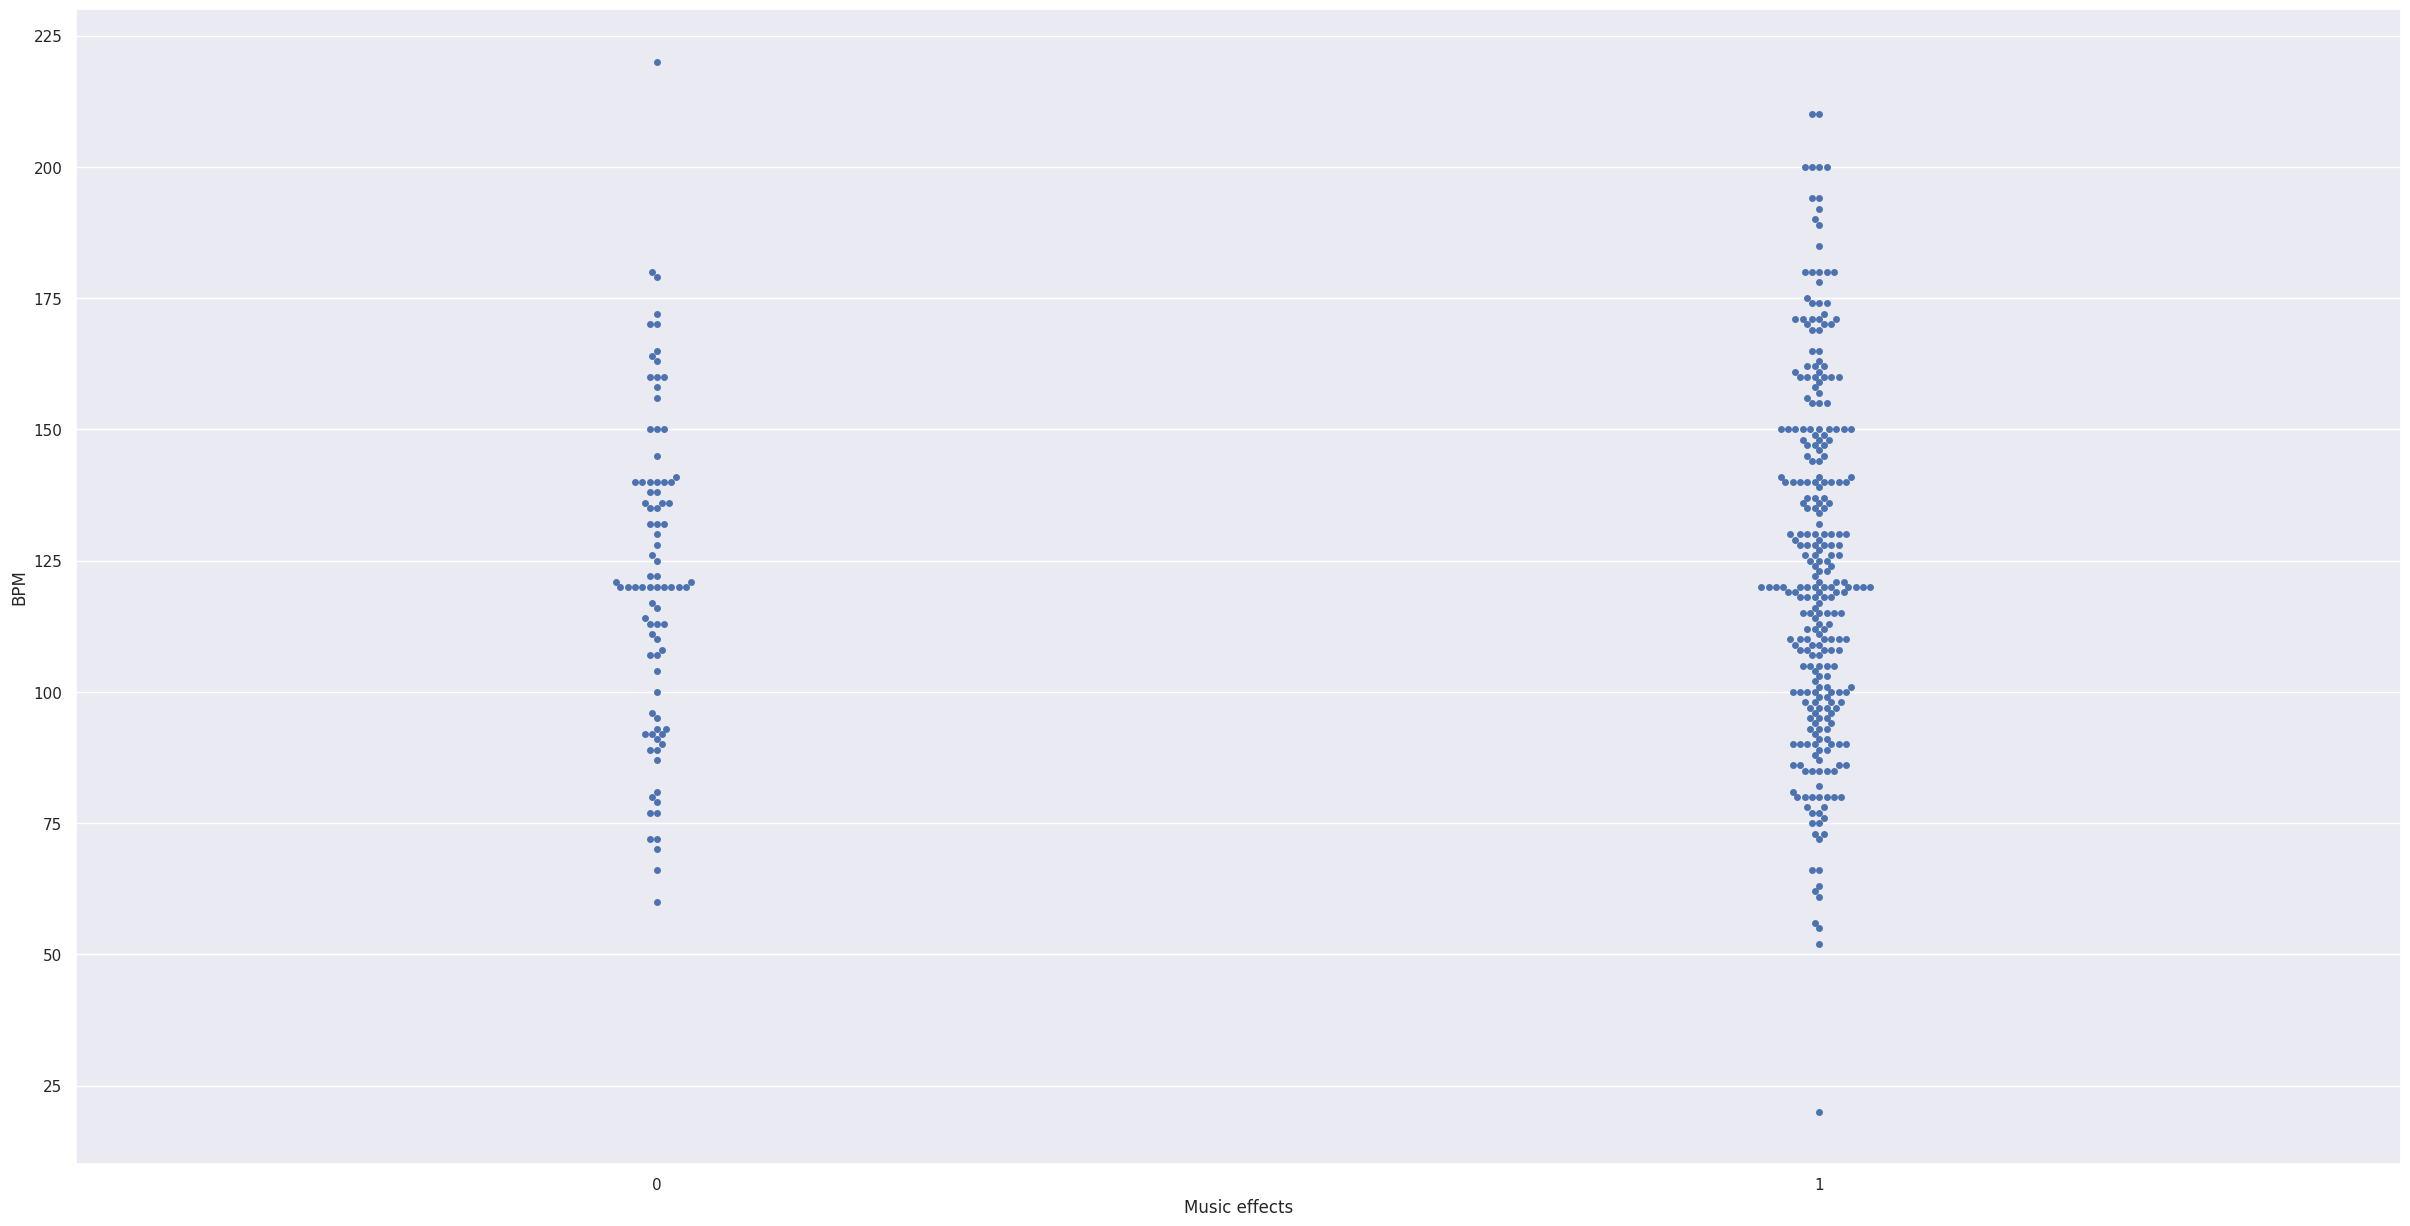

In [18]:
f, axes = plt.subplots(1, 1, figsize=(30, 15))
sb.swarmplot(x = 'Music effects', y = 'BPM', data = df_clean)

<AxesSubplot: xlabel='Insomnia', ylabel='BPM'>

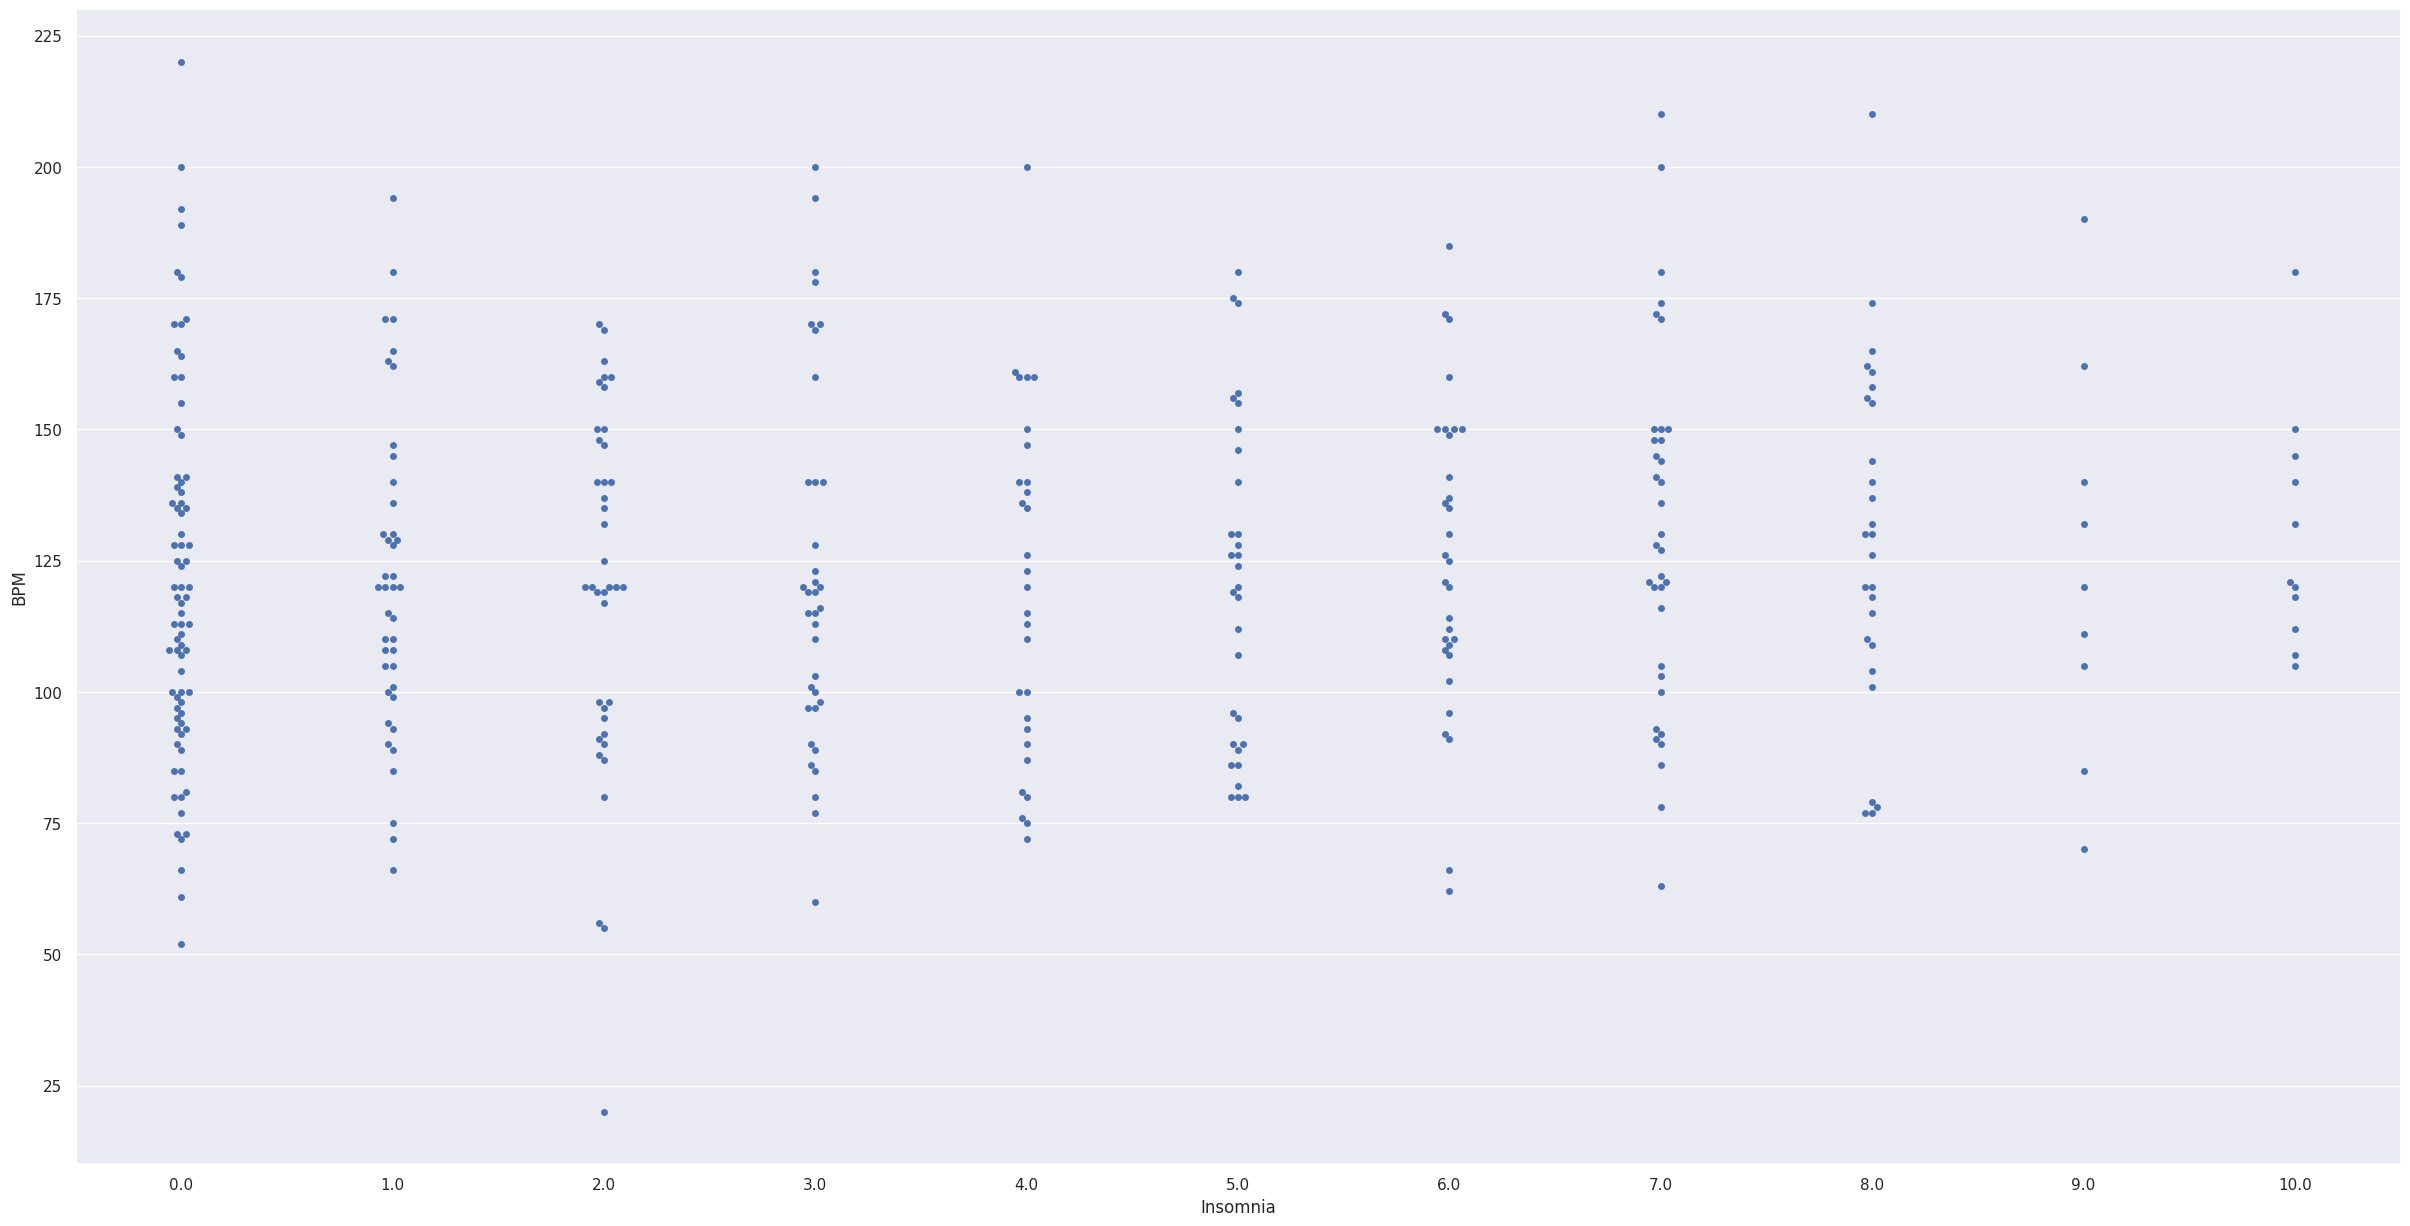

In [19]:
f, axes = plt.subplots(1, 1, figsize=(30, 15))
sb.swarmplot(x = 'Insomnia', y = 'BPM', data = df_clean)

<AxesSubplot: xlabel='Anxiety', ylabel='BPM'>

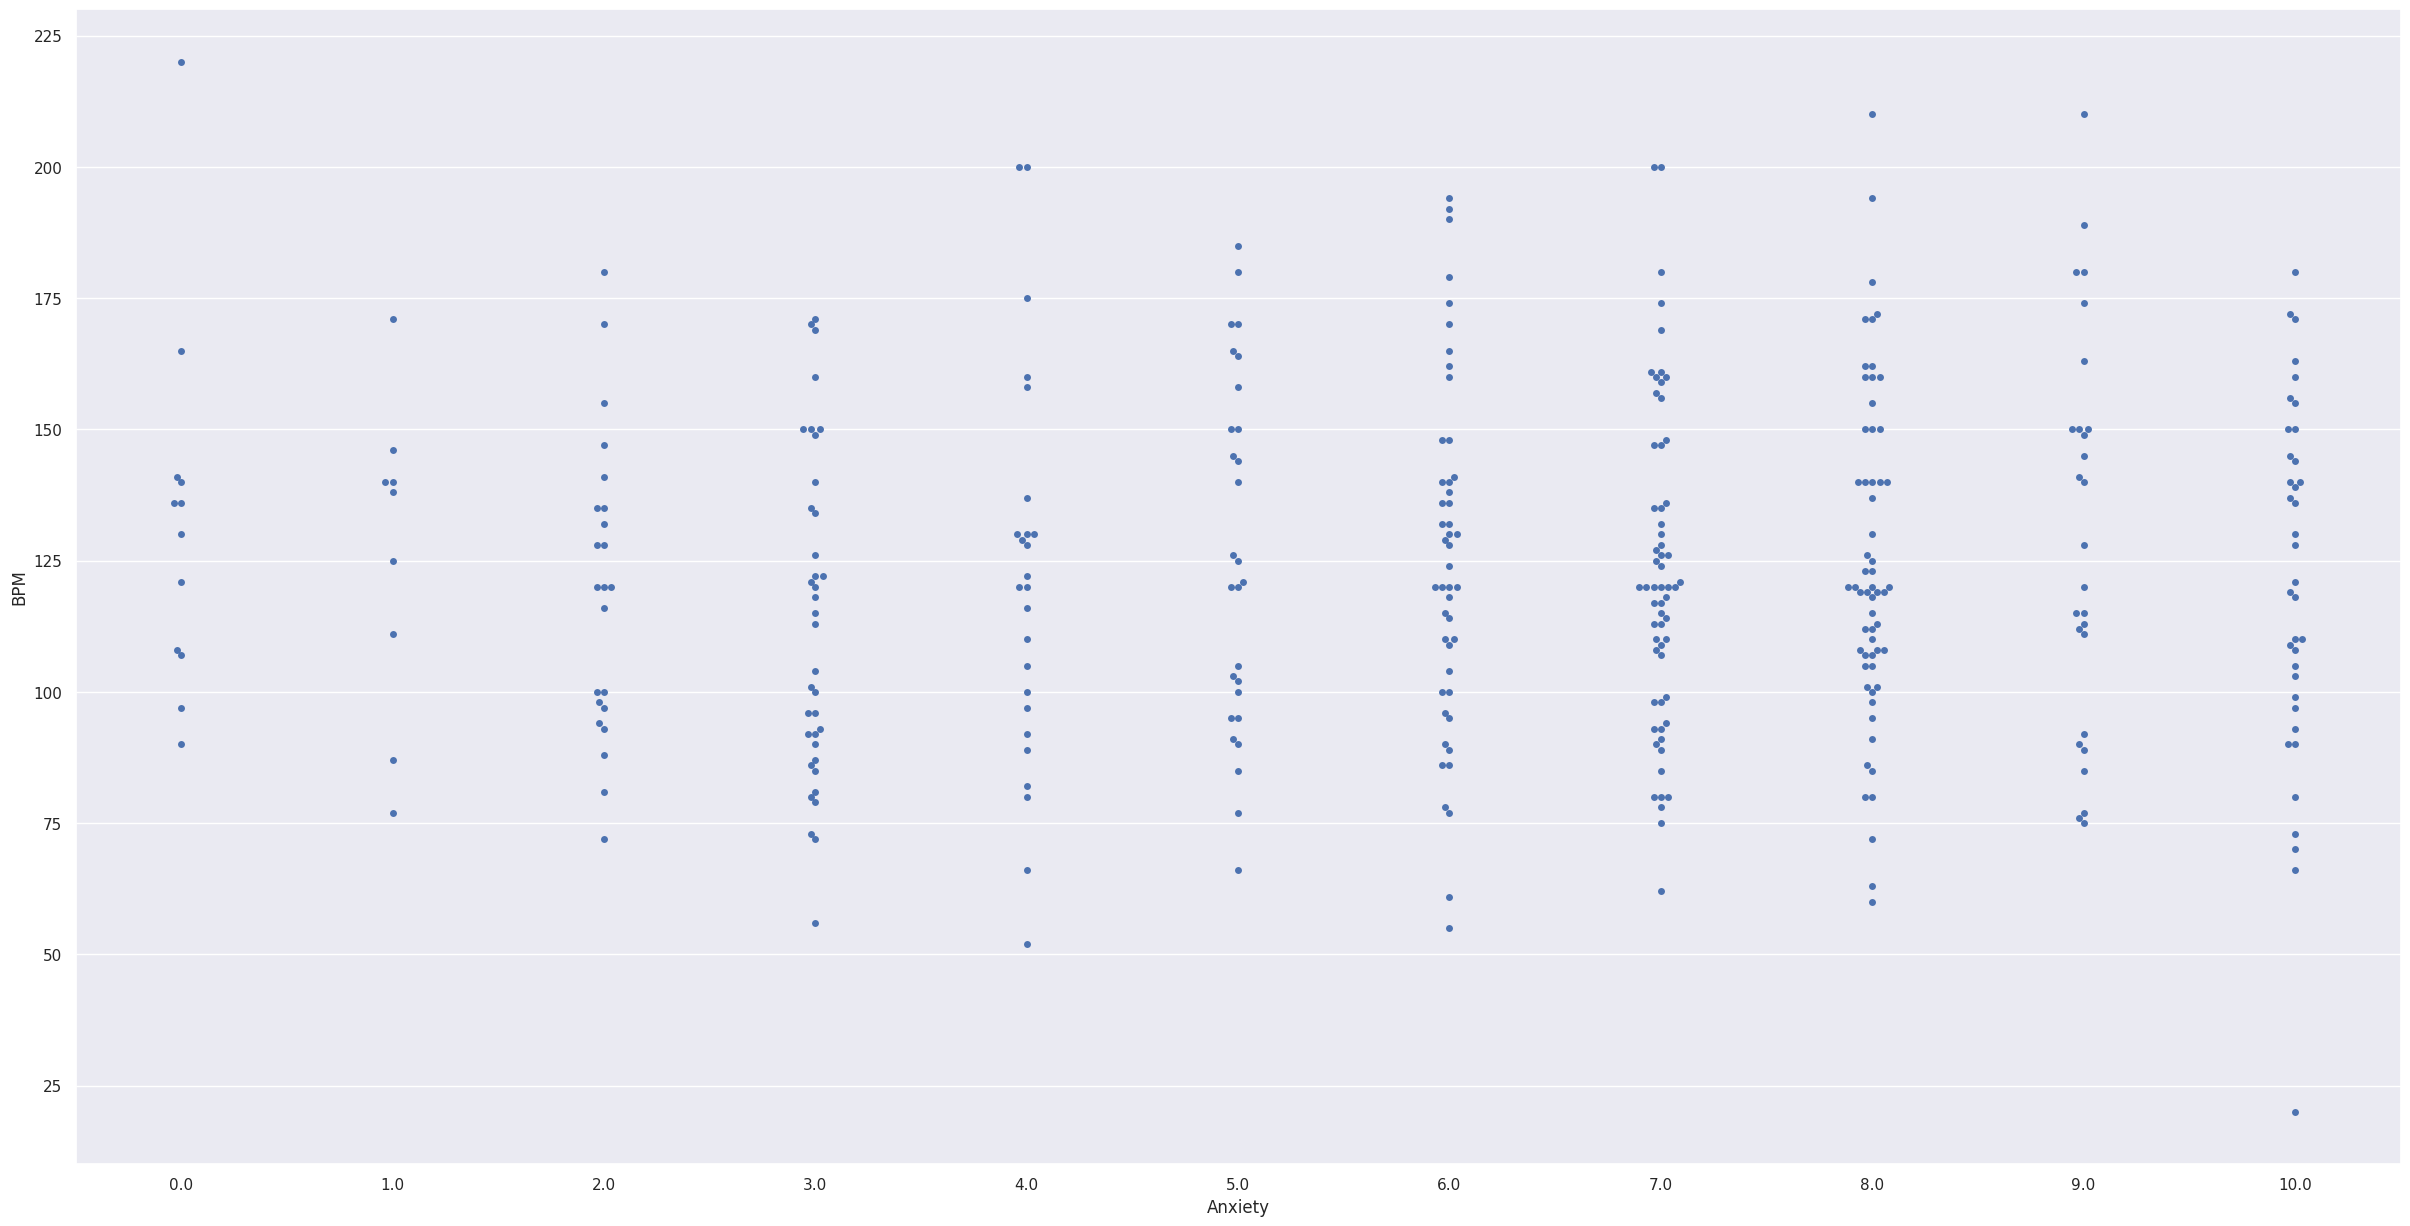

In [20]:
f, axes = plt.subplots(1, 1, figsize=(30, 15))
sb.swarmplot(x = 'Anxiety', y = 'BPM', data = df_clean)

<AxesSubplot: xlabel='Depression', ylabel='BPM'>

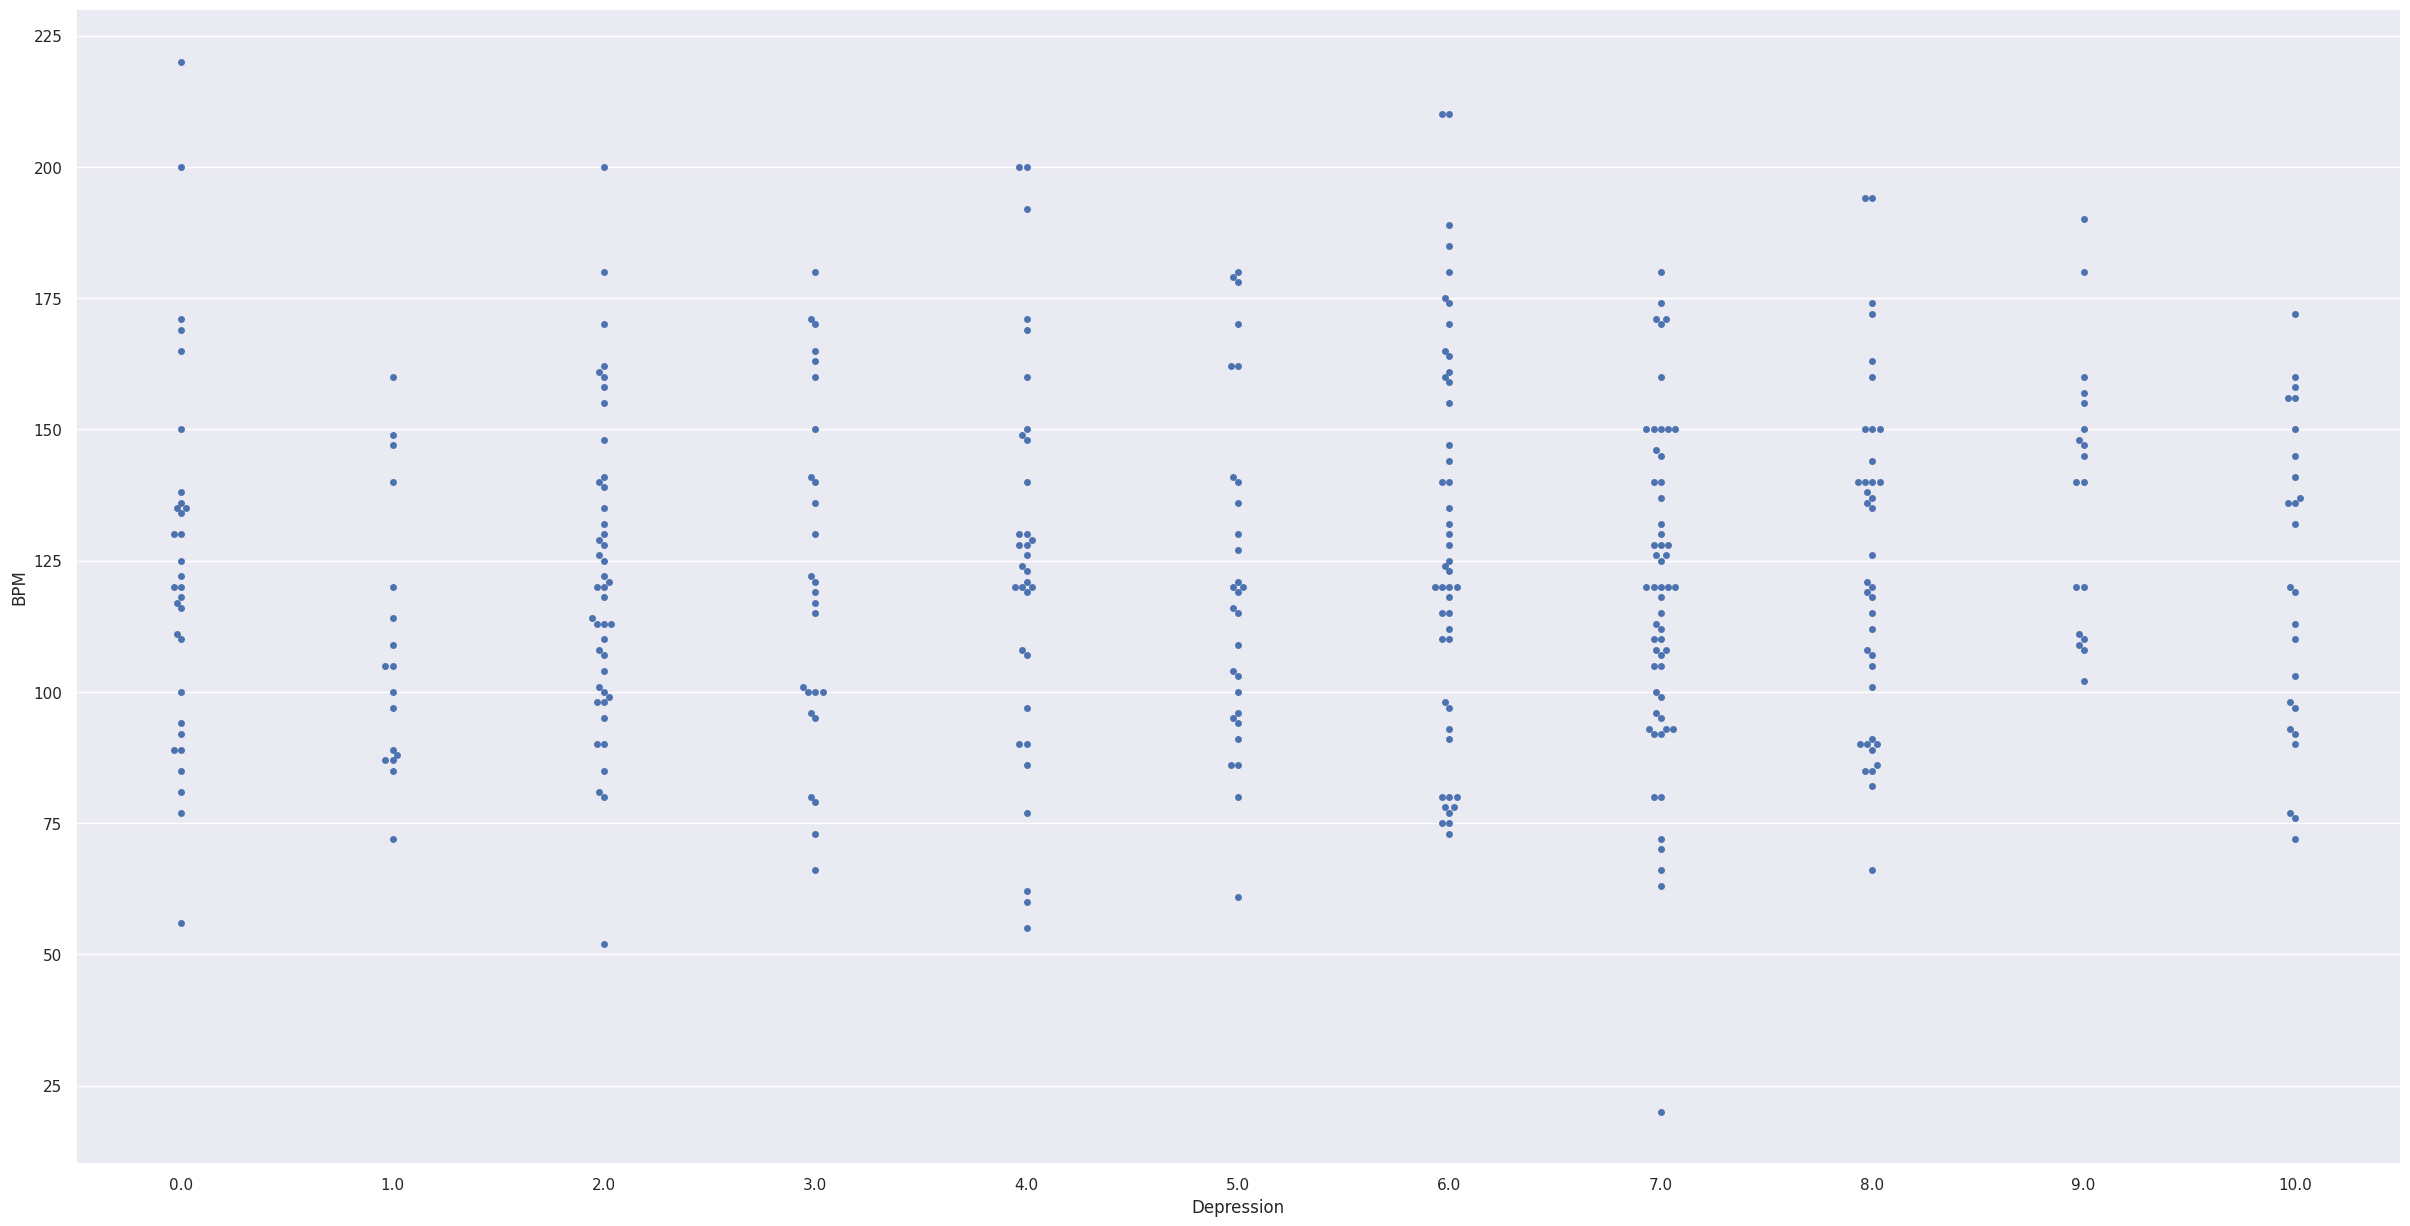

In [21]:
f, axes = plt.subplots(1, 1, figsize=(30, 15))
sb.swarmplot(x = 'Depression', y = 'BPM', data = df_clean)

<AxesSubplot: xlabel='Insomnia', ylabel='Hours per day'>

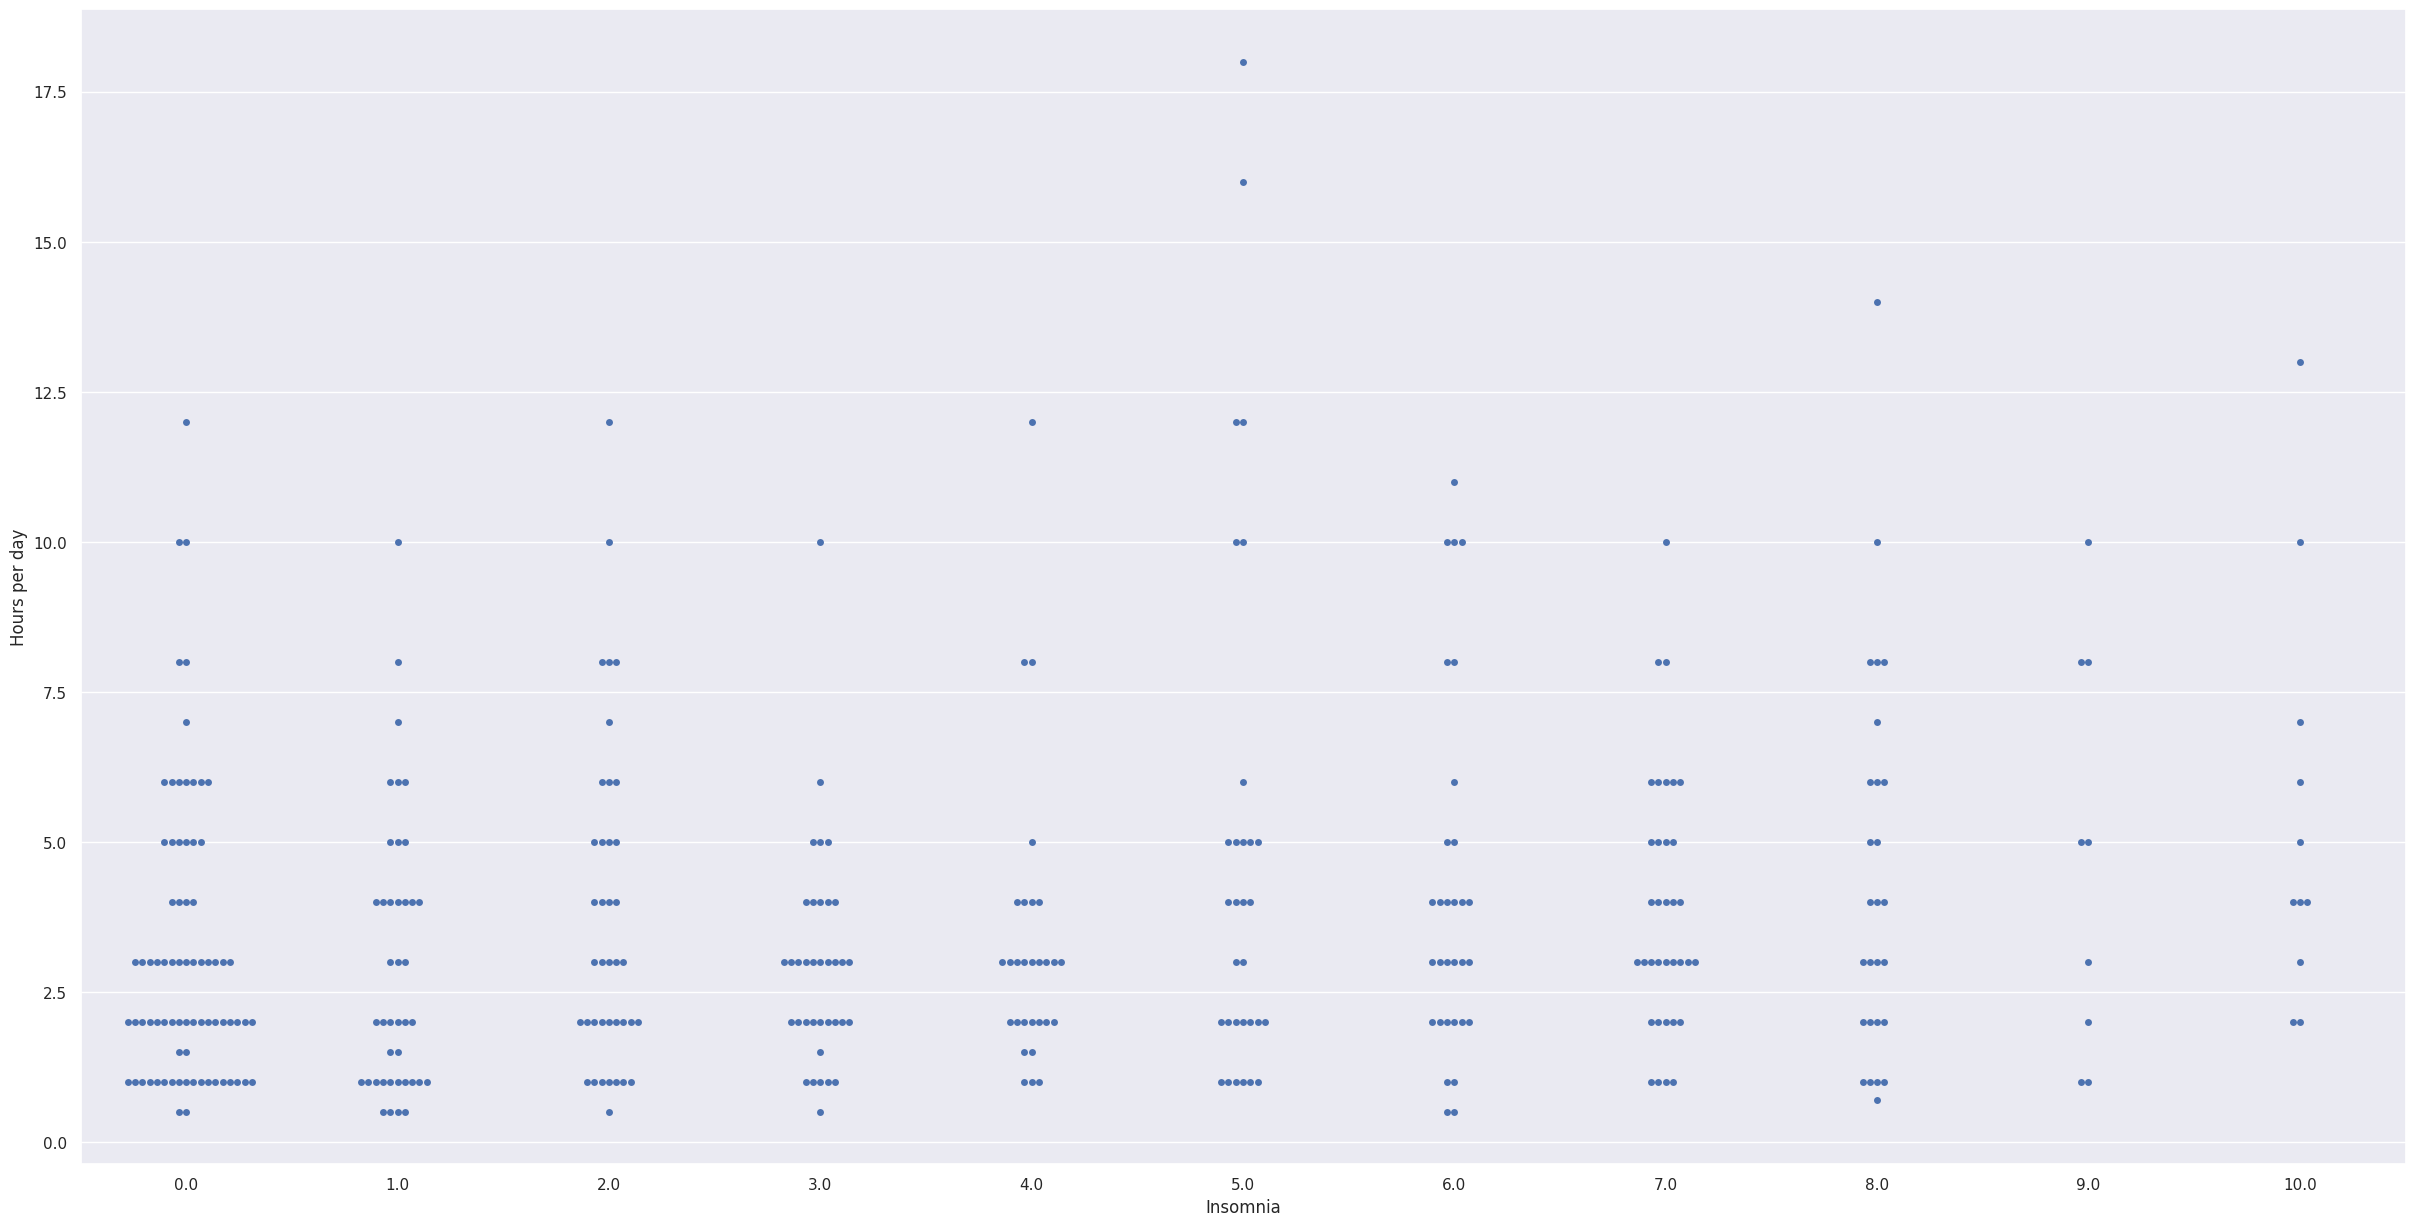

In [22]:
f, axes = plt.subplots(1, 1, figsize=(30, 15))
sb.swarmplot(x = 'Insomnia', y = 'Hours per day', data = df_clean)

<AxesSubplot: xlabel='Anxiety', ylabel='Hours per day'>

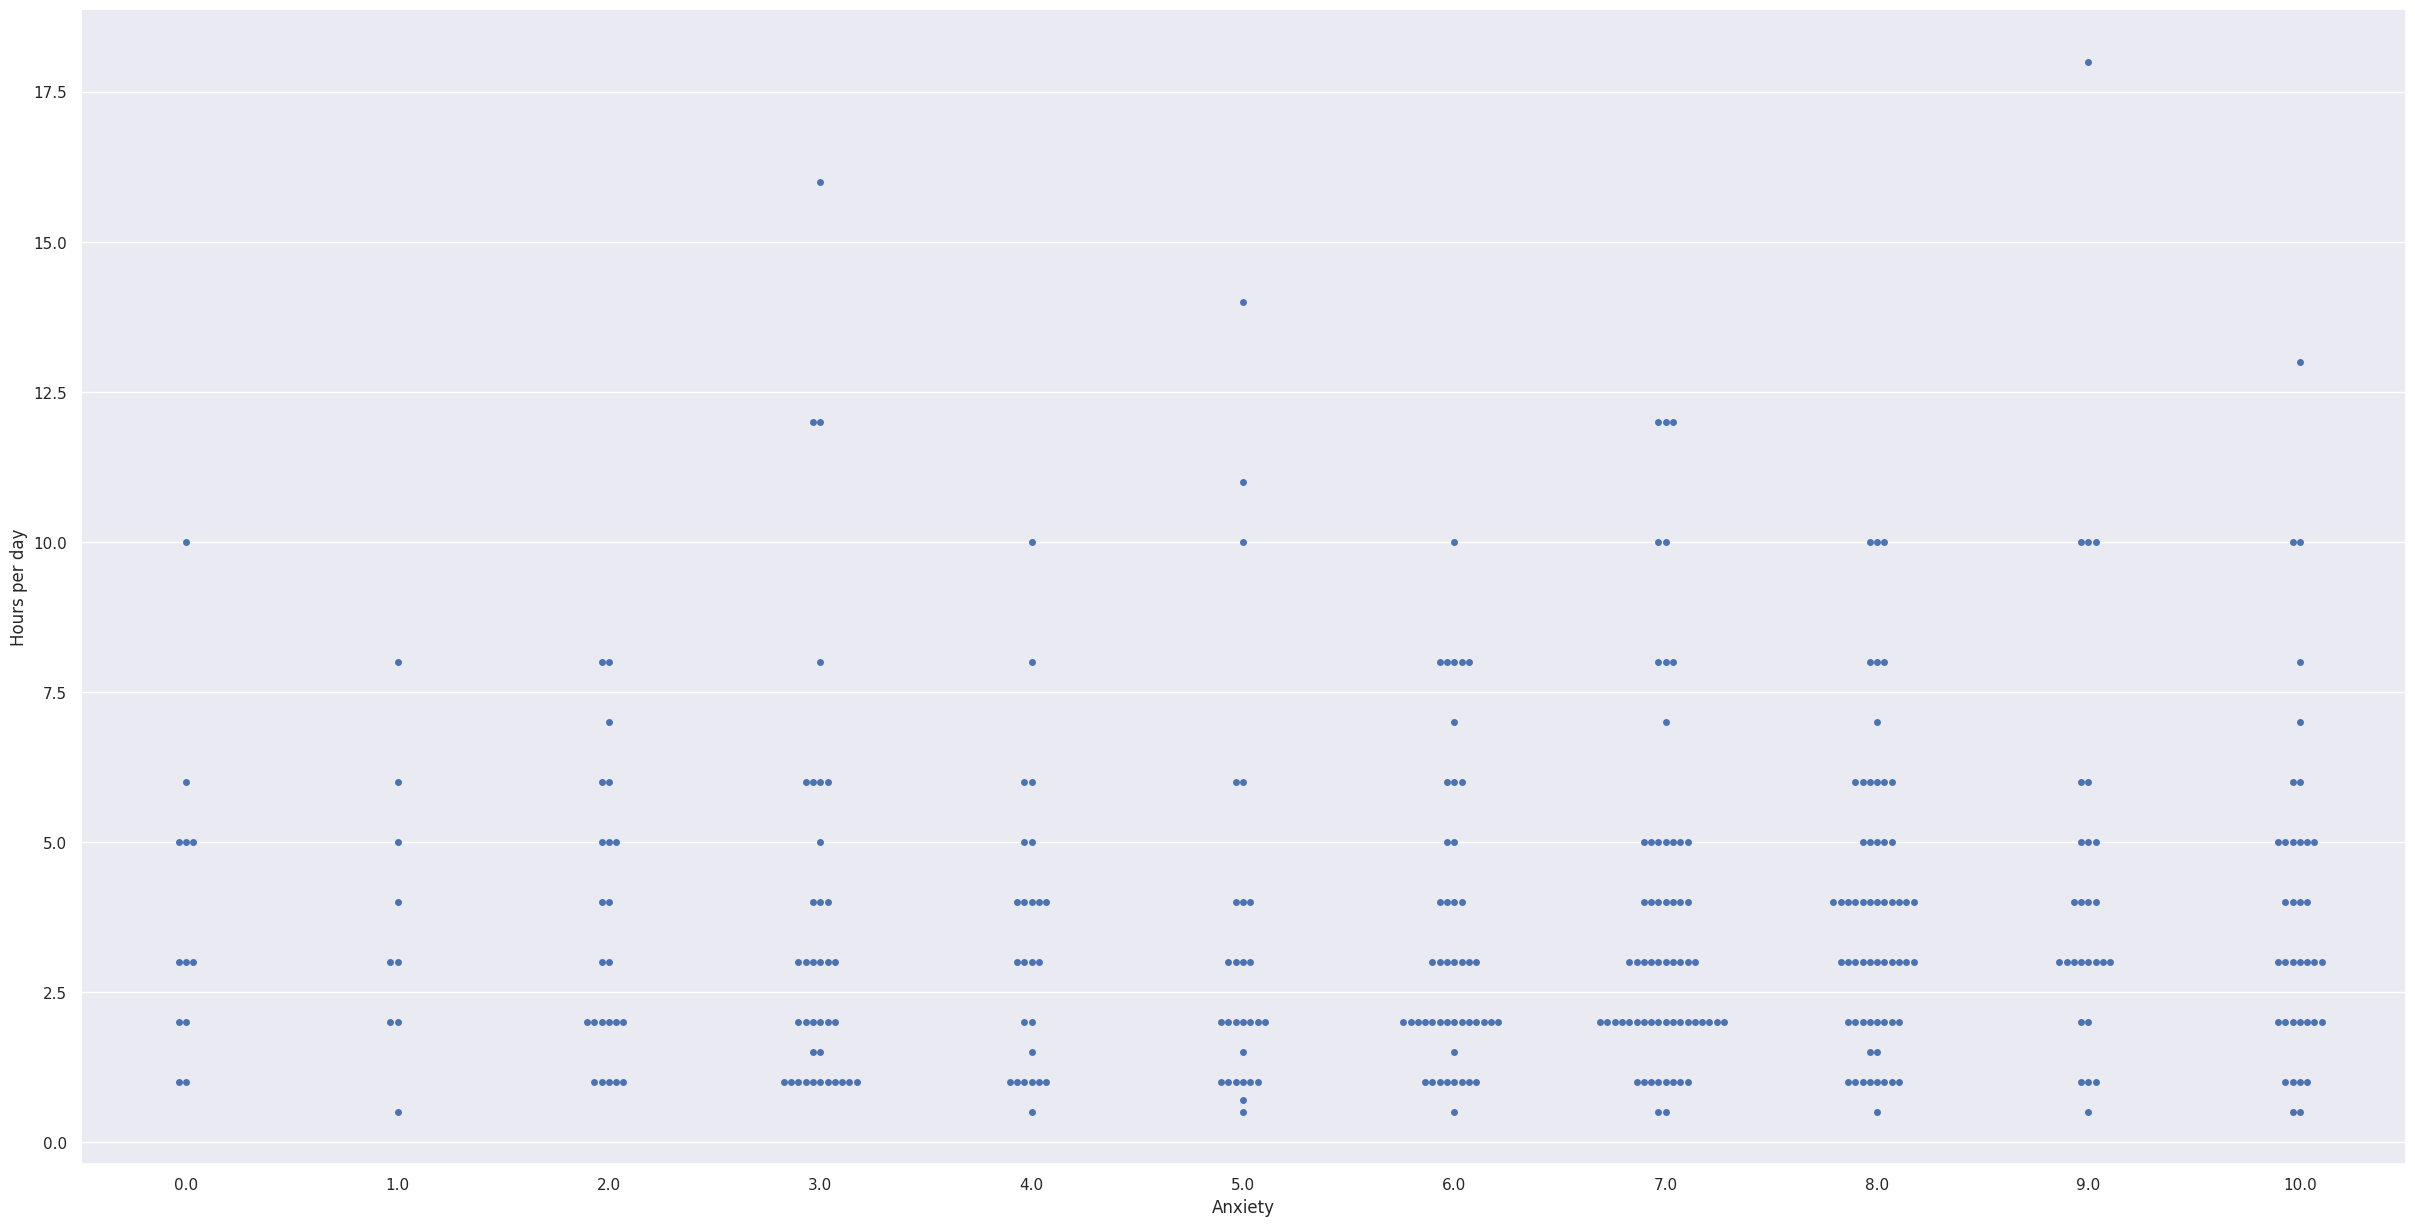

In [23]:
f, axes = plt.subplots(1, 1, figsize=(30, 15))
sb.swarmplot(x = 'Anxiety', y = 'Hours per day', data = df_clean)

<AxesSubplot: xlabel='Depression', ylabel='Hours per day'>

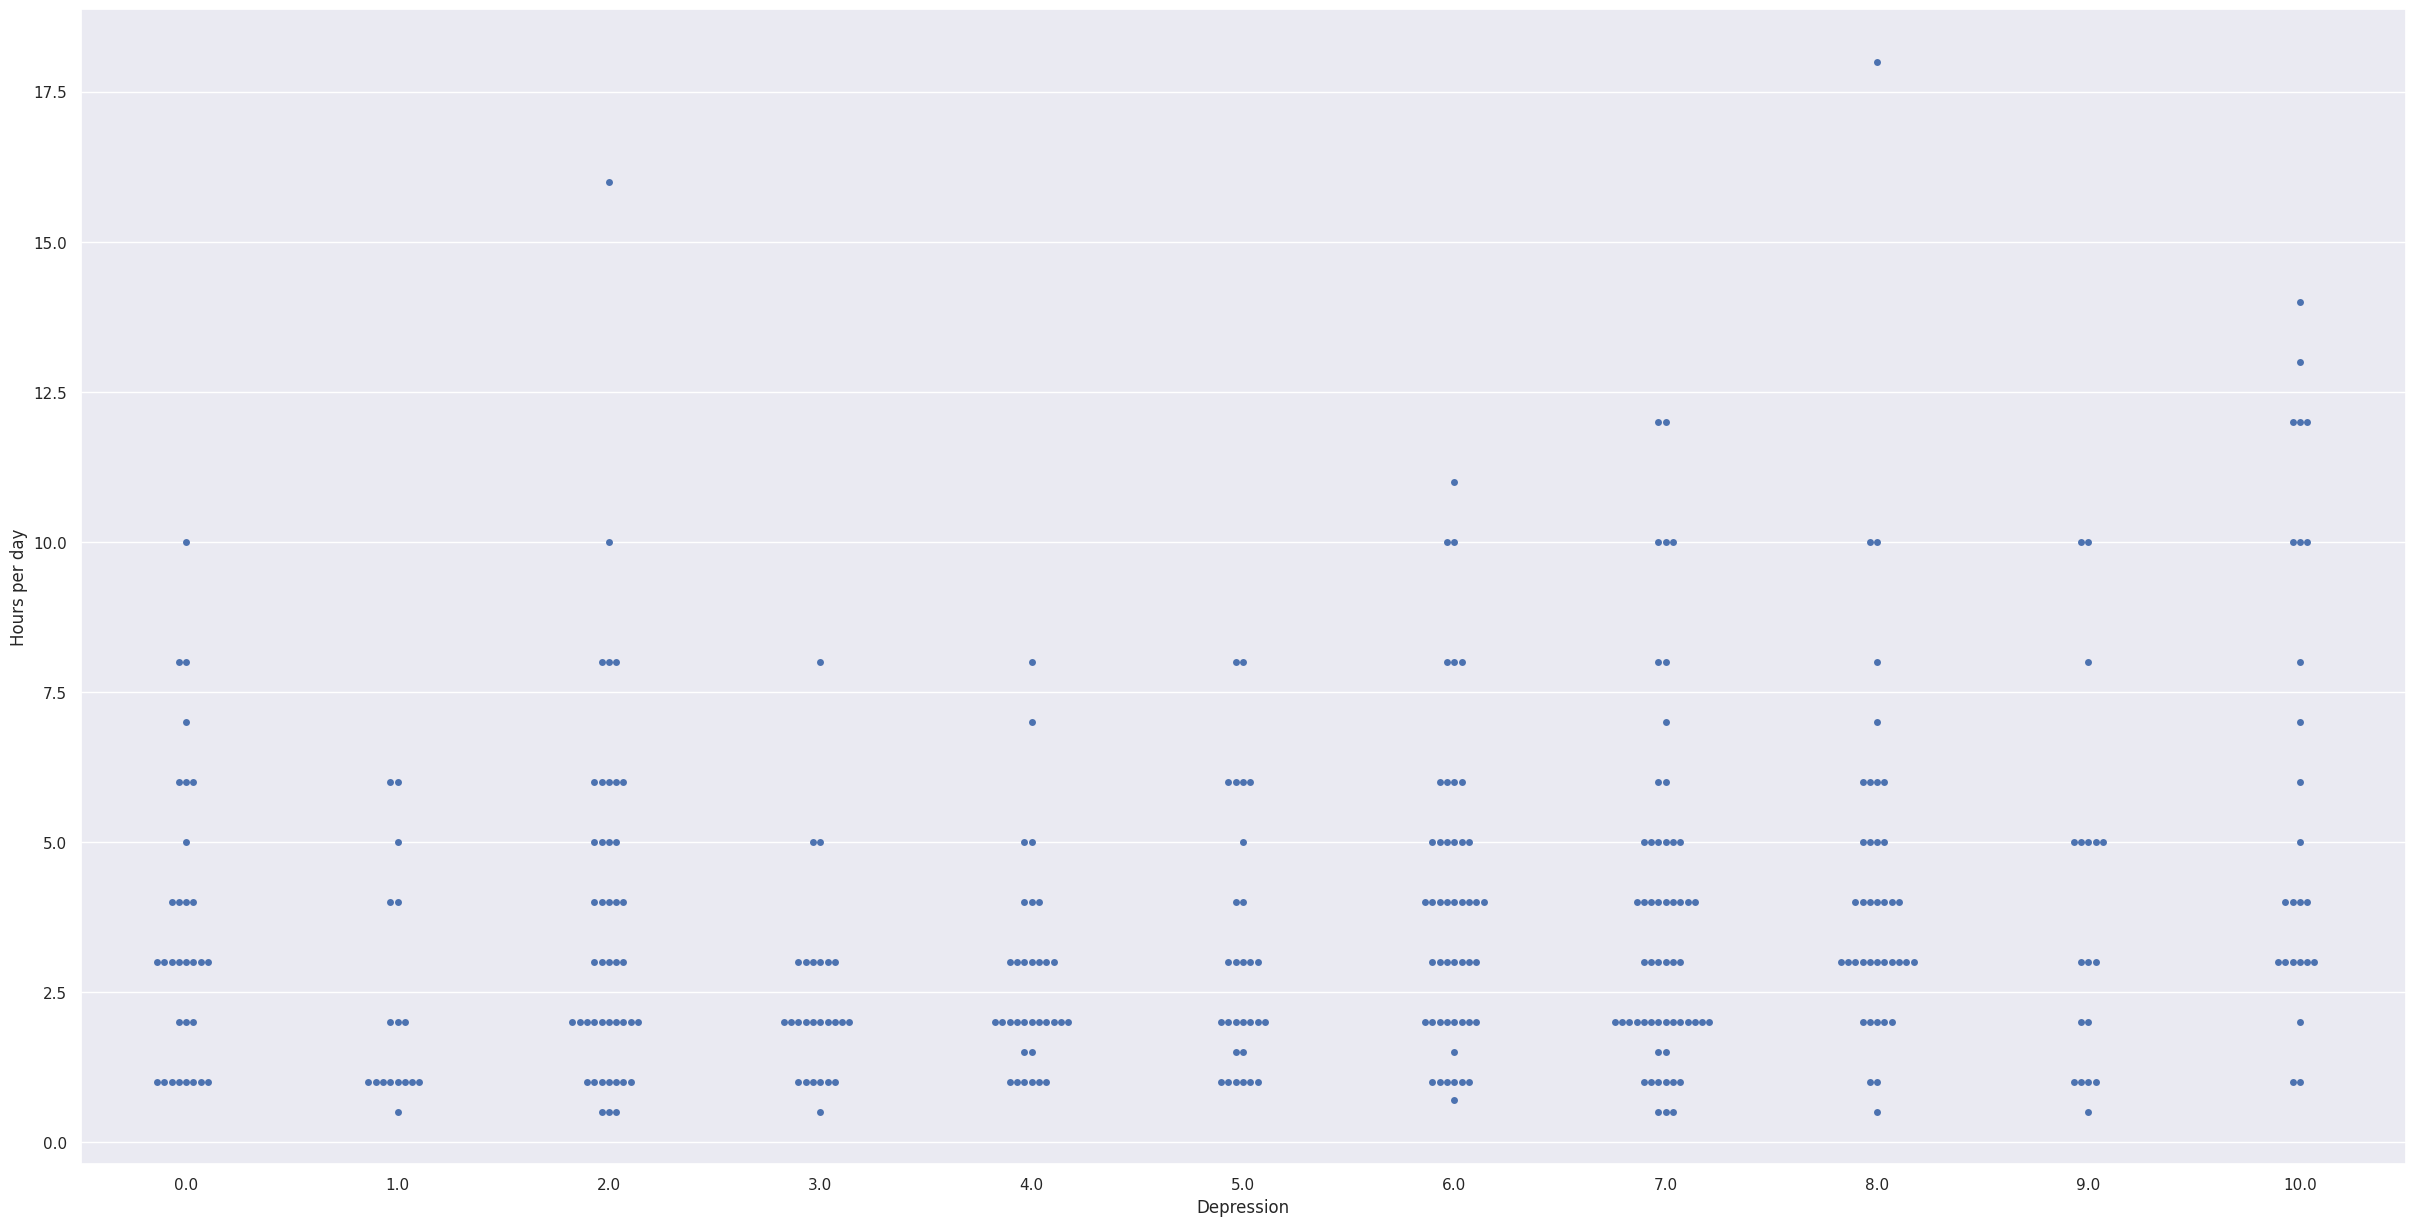

In [24]:
f, axes = plt.subplots(1, 1, figsize=(30, 15))
sb.swarmplot(x = 'Depression', y = 'Hours per day', data = df_clean)

<AxesSubplot: xlabel='Music effects', ylabel='Hours per day'>

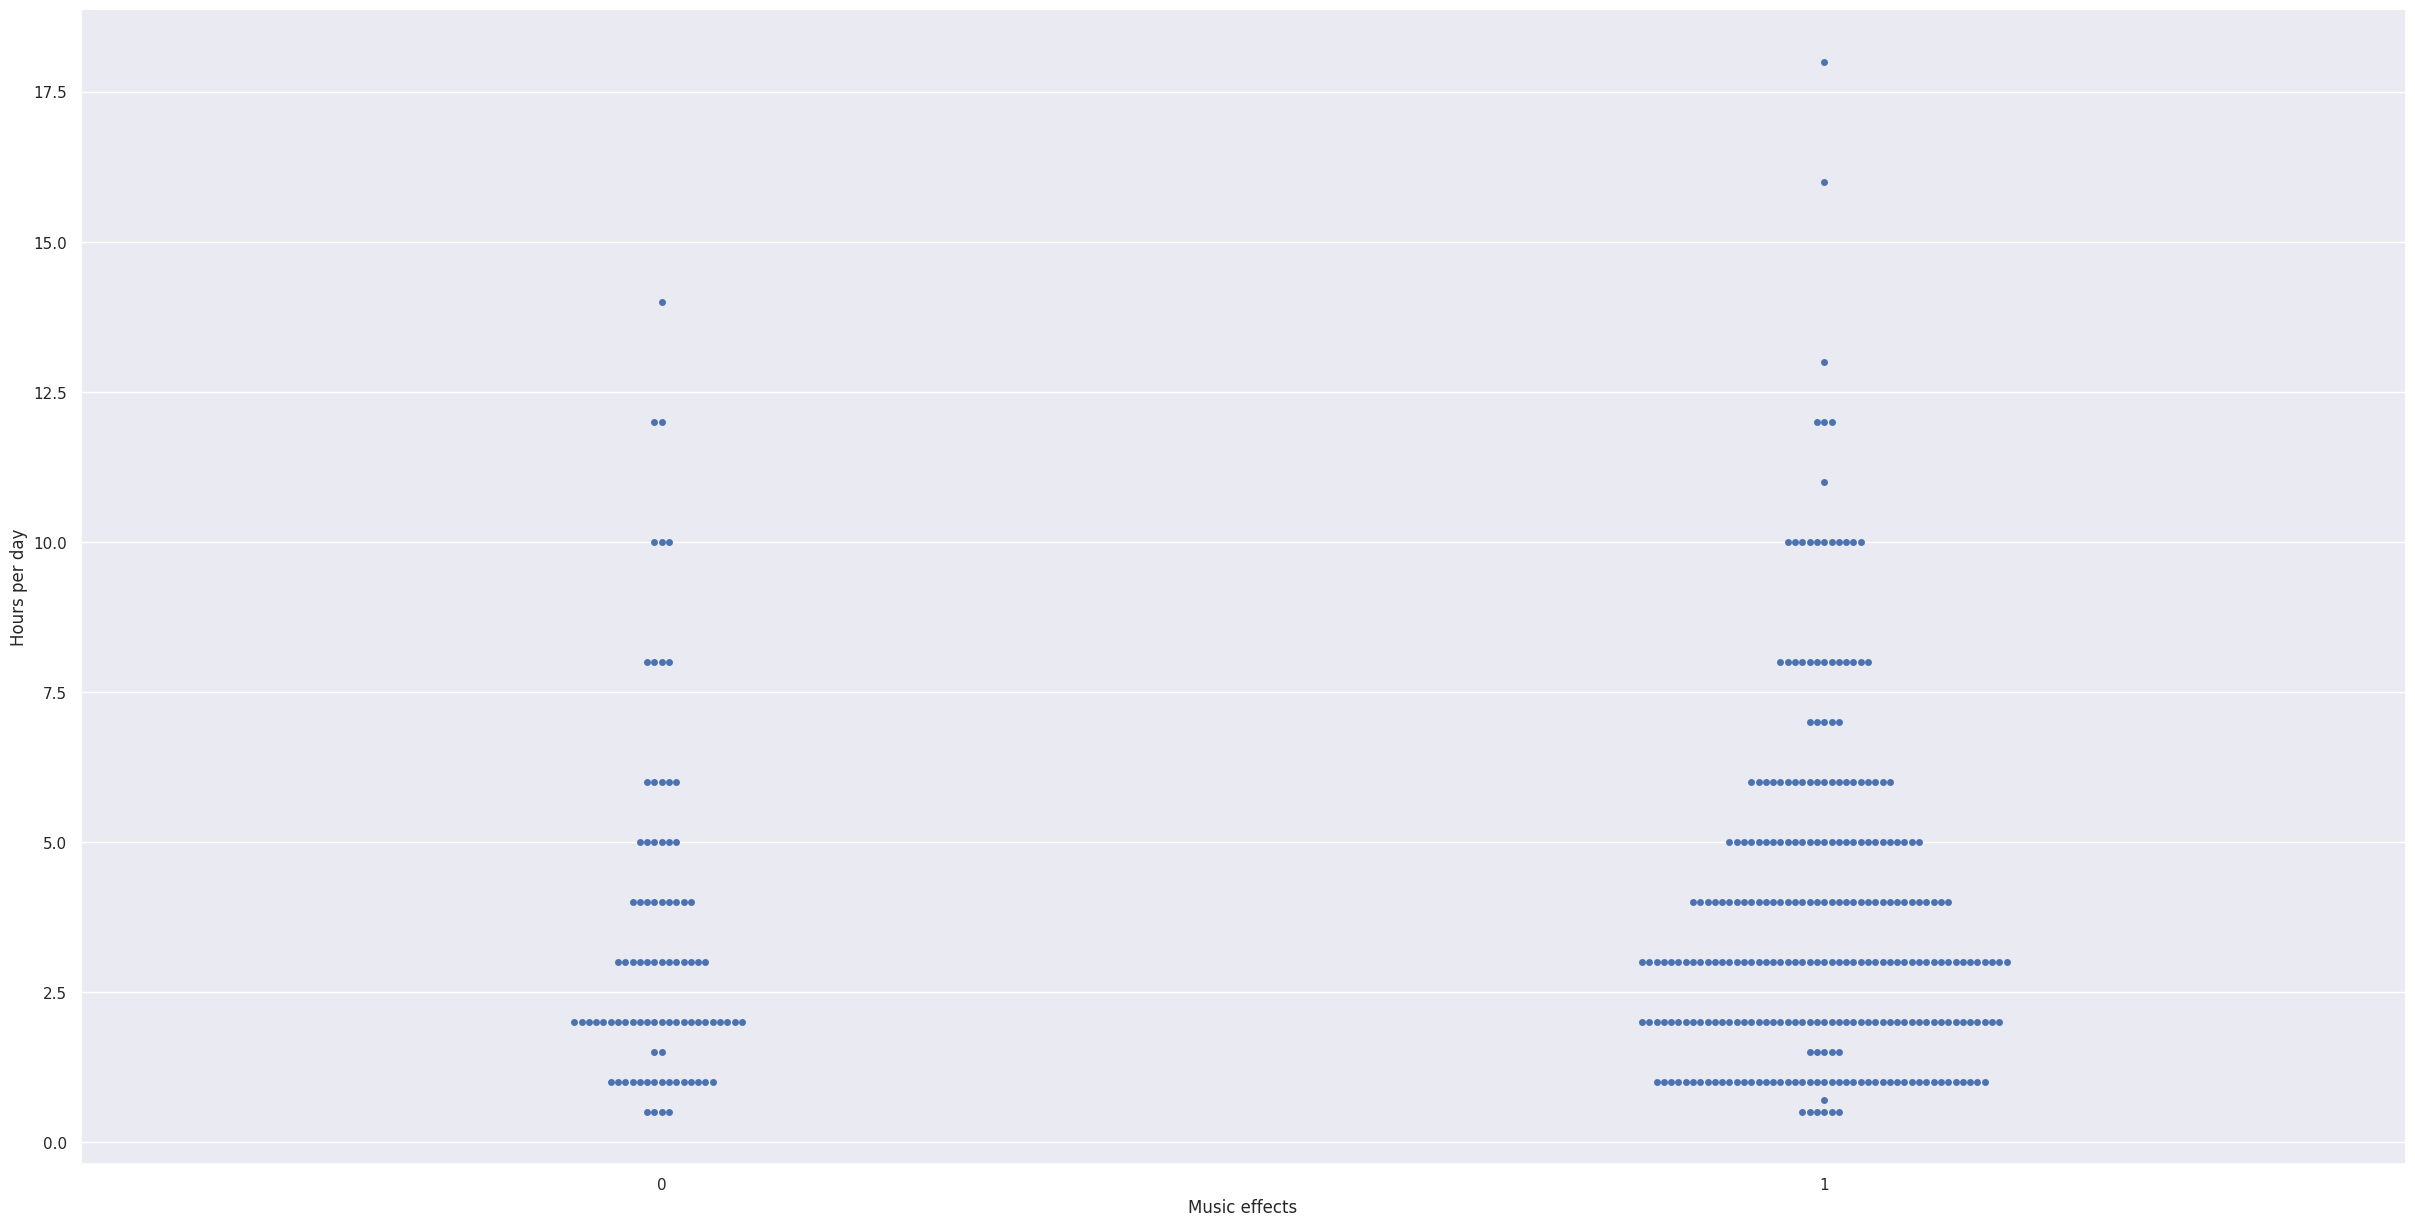

In [25]:
f, axes = plt.subplots(1, 1, figsize=(30, 15))
sb.swarmplot(x = 'Music effects', y = 'Hours per day', data = df_clean)

SOLUTIONS

Classification Tree with seperate models discussing about whether factors pose a postivie effect on the target group

Train Set : (257, 1) (257, 1)
Test Set  : (109, 1) (109, 1)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5330739299610895

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.41284403669724773



<AxesSubplot: >

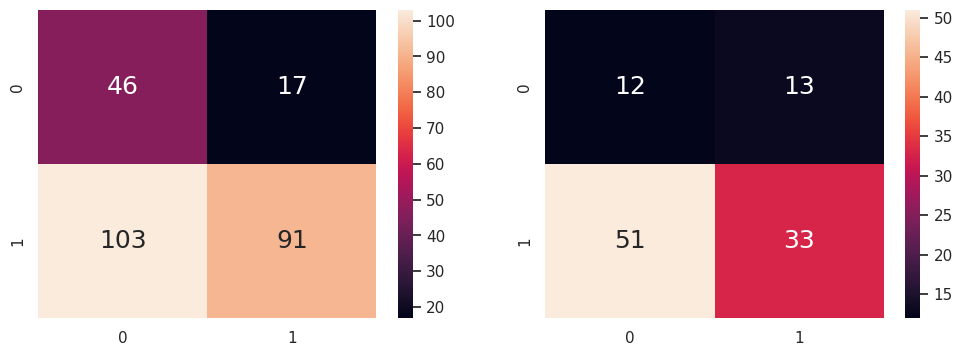

In [26]:
#Tree model for BPM and Music Effects


# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(df_clean['Music effects'])
X = pd.DataFrame(df_clean[["BPM"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 109)

# Check the Sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=2, class_weight='balanced')  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

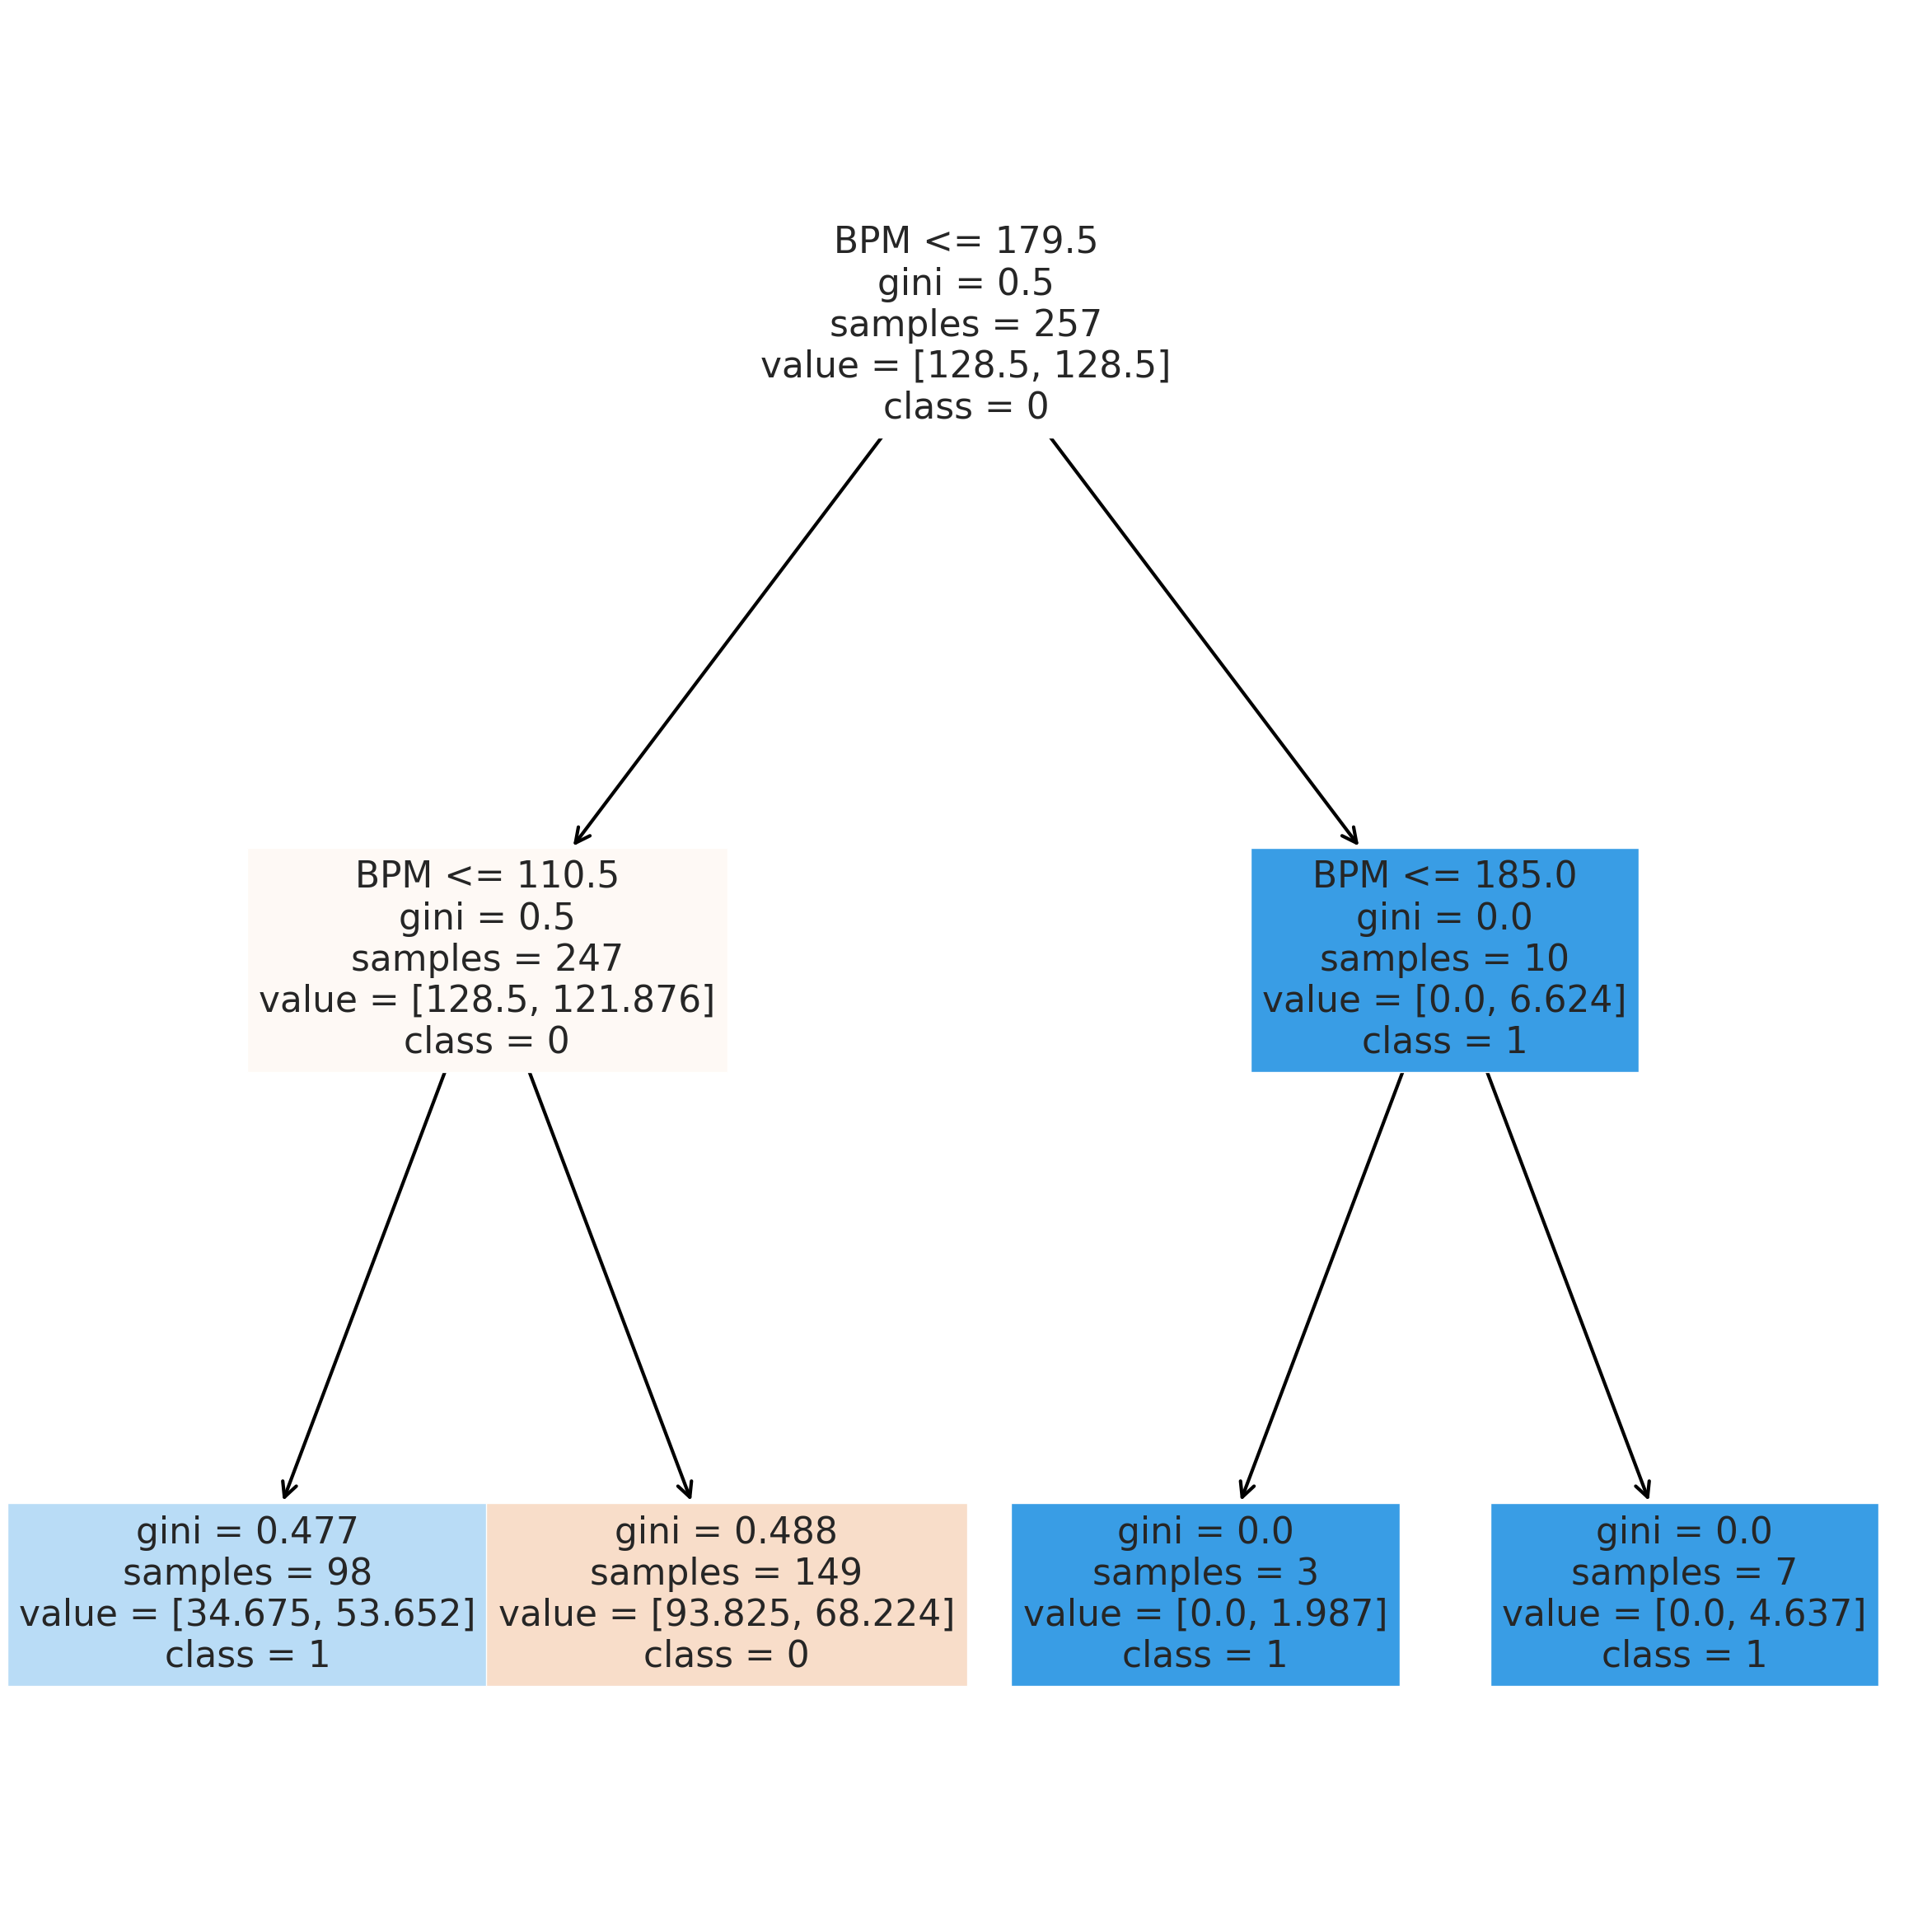

In [27]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(30, 30))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Train Set : (256, 1) (256, 1)
Test Set  : (110, 1) (110, 1)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.609375

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5363636363636364



<AxesSubplot: >

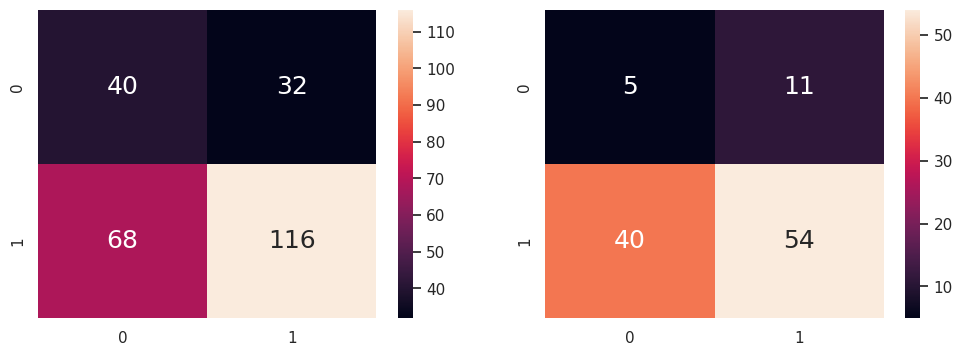

In [28]:
#tree model for hours per day and music effects

# Extract Response and Predictors
y = pd.DataFrame(df_clean['Music effects'])
X = pd.DataFrame(df_clean[["Hours per day"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Check the Sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Decision Tree using Train Data
# Class weight balance is used to handle imbalanced datasets, which can an lead to a biased model that favors the majority class
# Class_weight='balanced' -> assign higher weights to the samples of the minority classes -> so we can get better accuracy in decision tree
dectree = DecisionTreeClassifier(max_depth=2, class_weight='balanced')  # create the decision tree object
dectree.fit(X_train, y_train)                                           # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

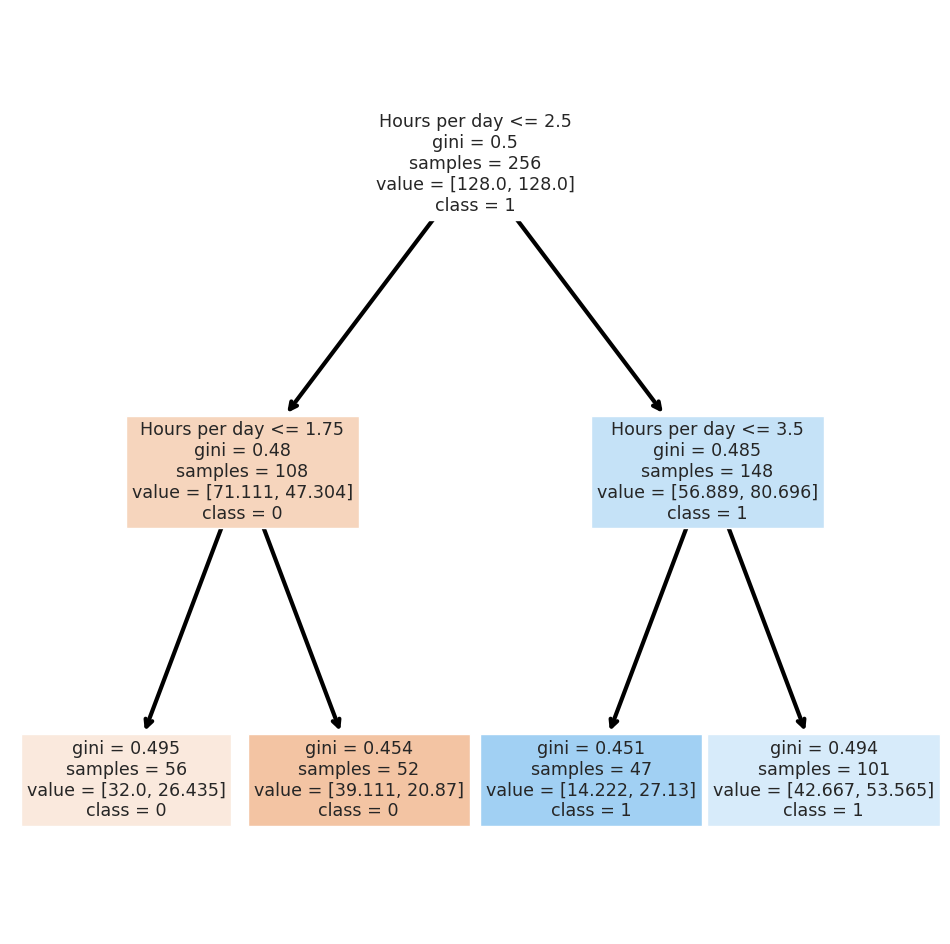

In [29]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Multi-Variable Decision Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.73828125

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8181818181818182



<AxesSubplot: >

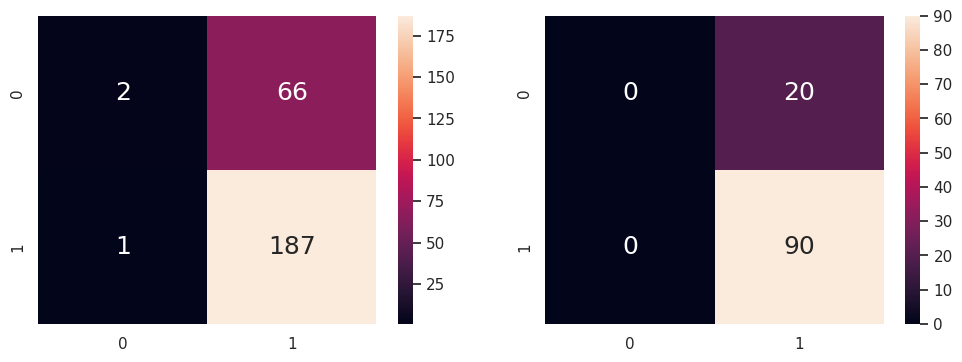

In [93]:
#combining the facotrs for the decision tree.

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["BPM", "Hours per day","Frequency [Gospel]","Frequency [Hip hop]","Frequency [Pop]","Frequency [R&B]"]
y = pd.DataFrame(df_tree['Music effects'])
X = pd.DataFrame(df_tree[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

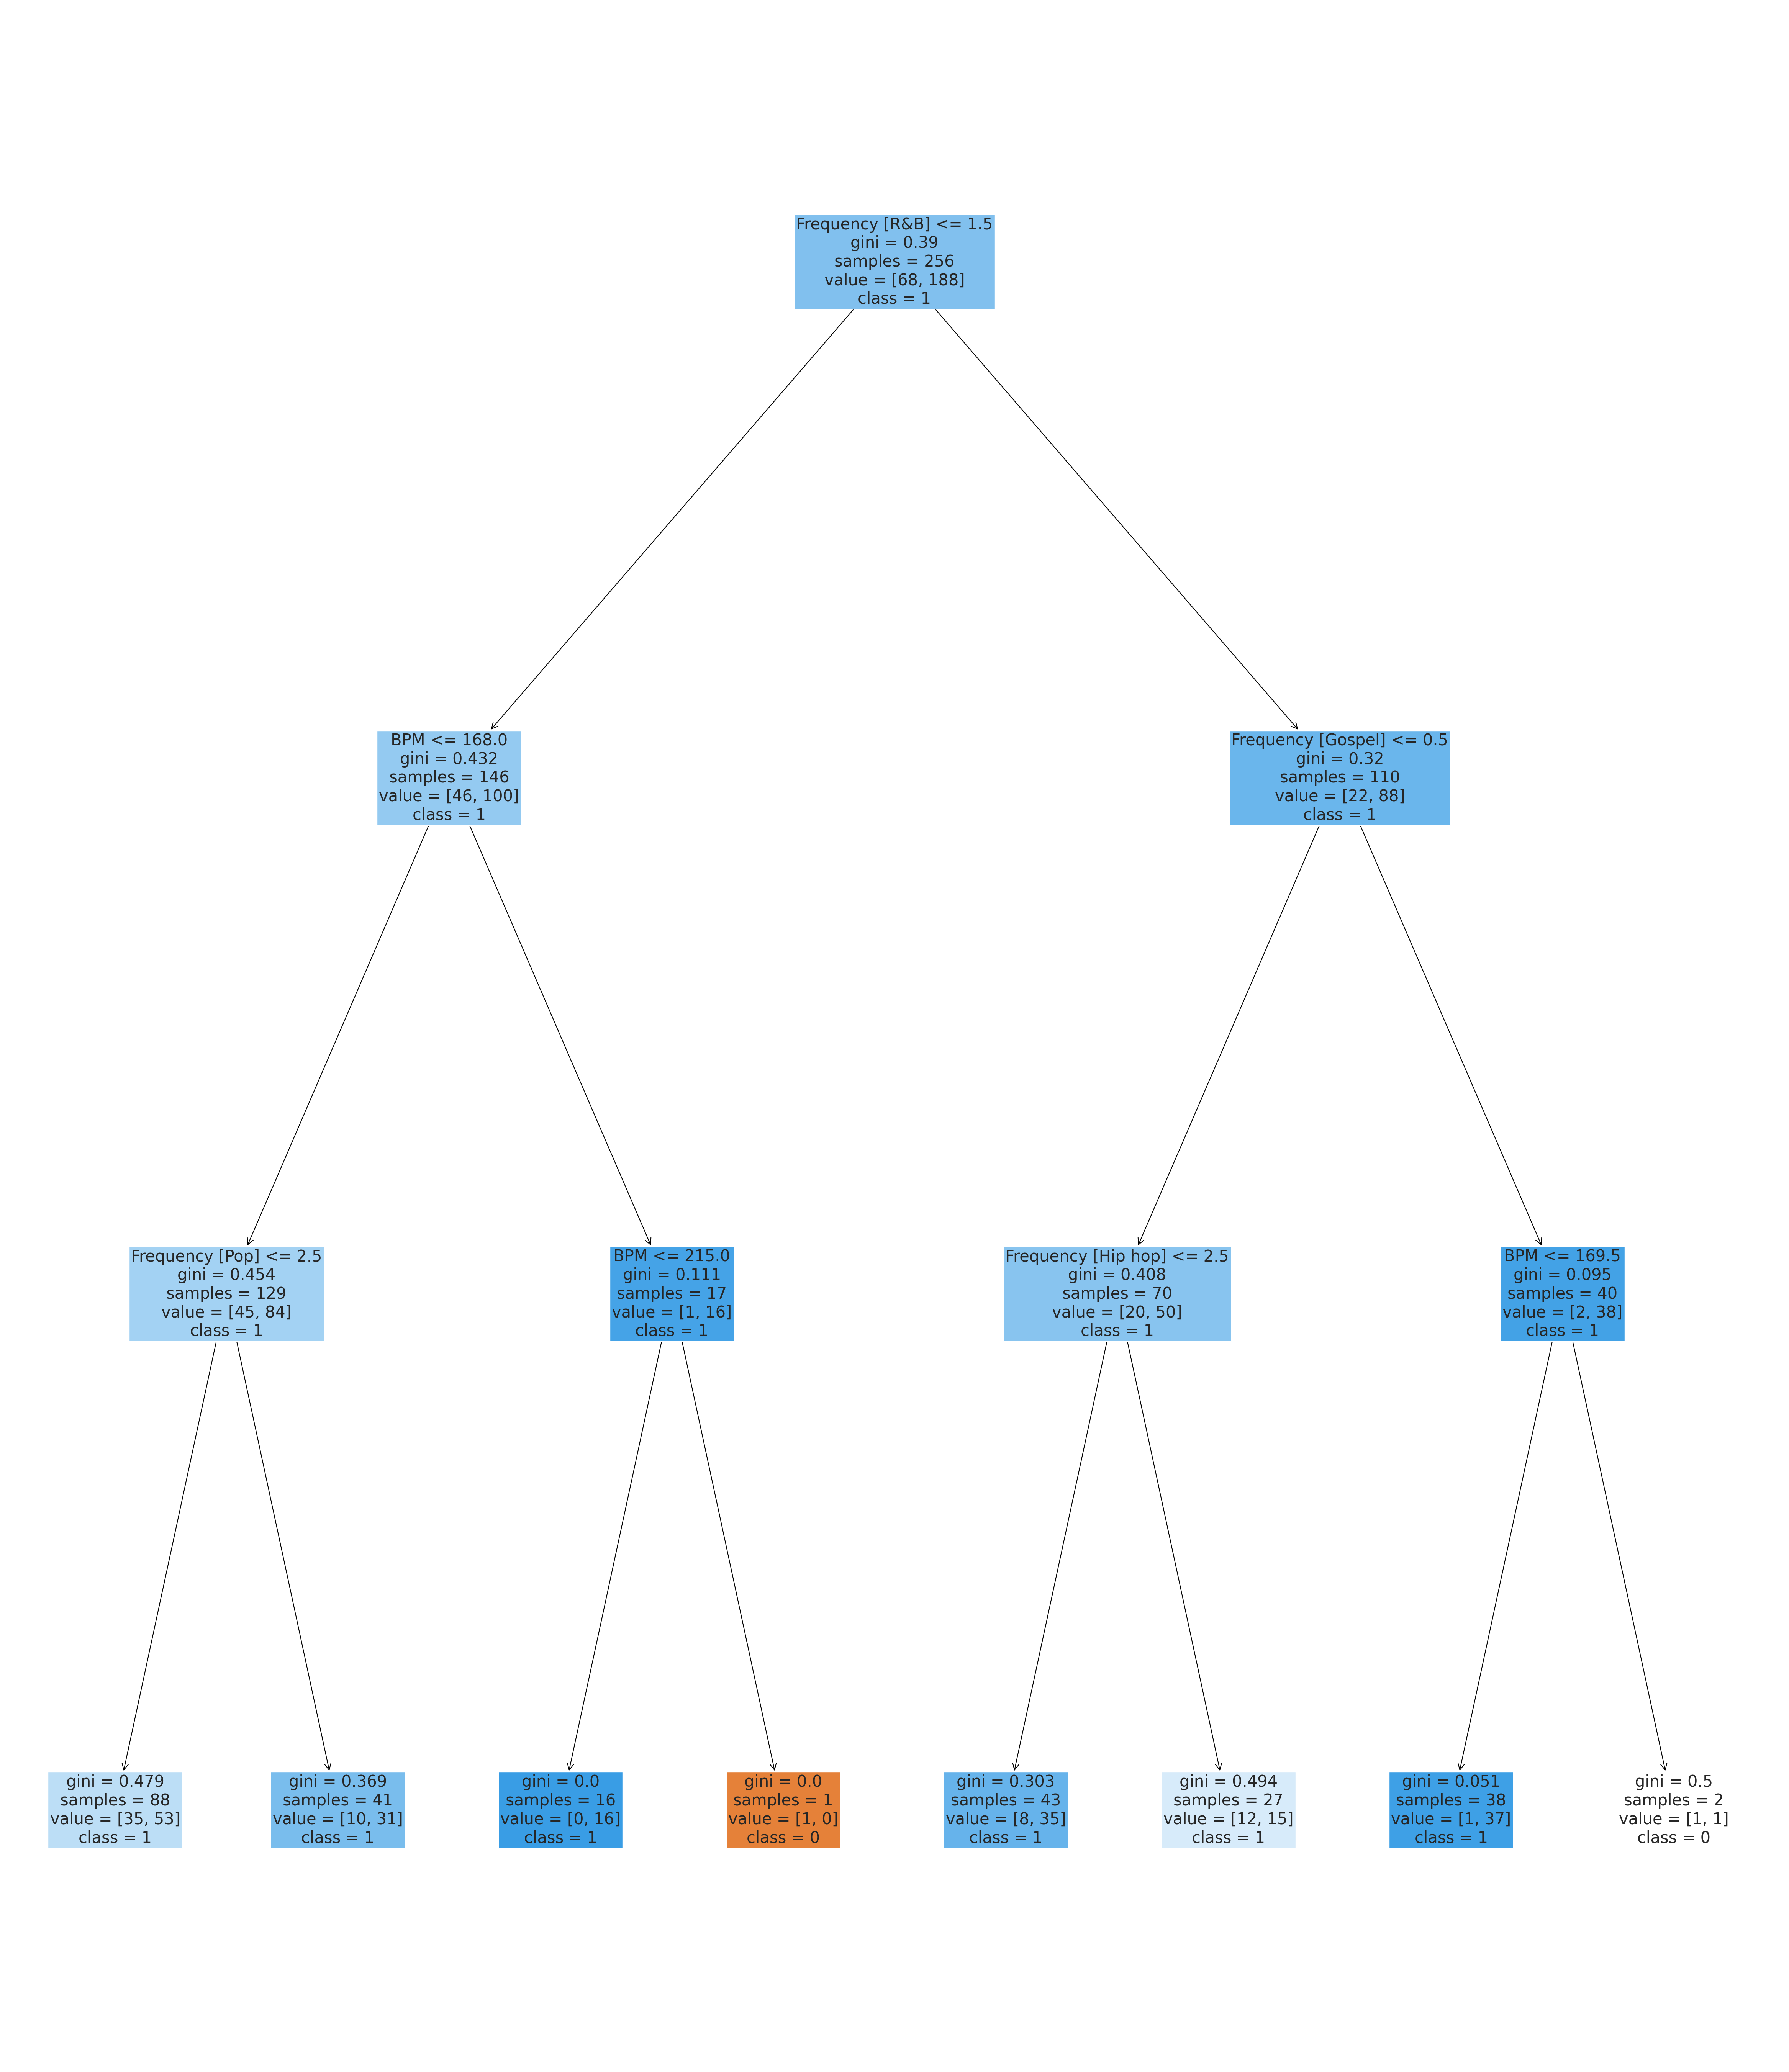

In [94]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(60, 70))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True,  fontsize=30)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1.5)
        
plt.show()

Clustering

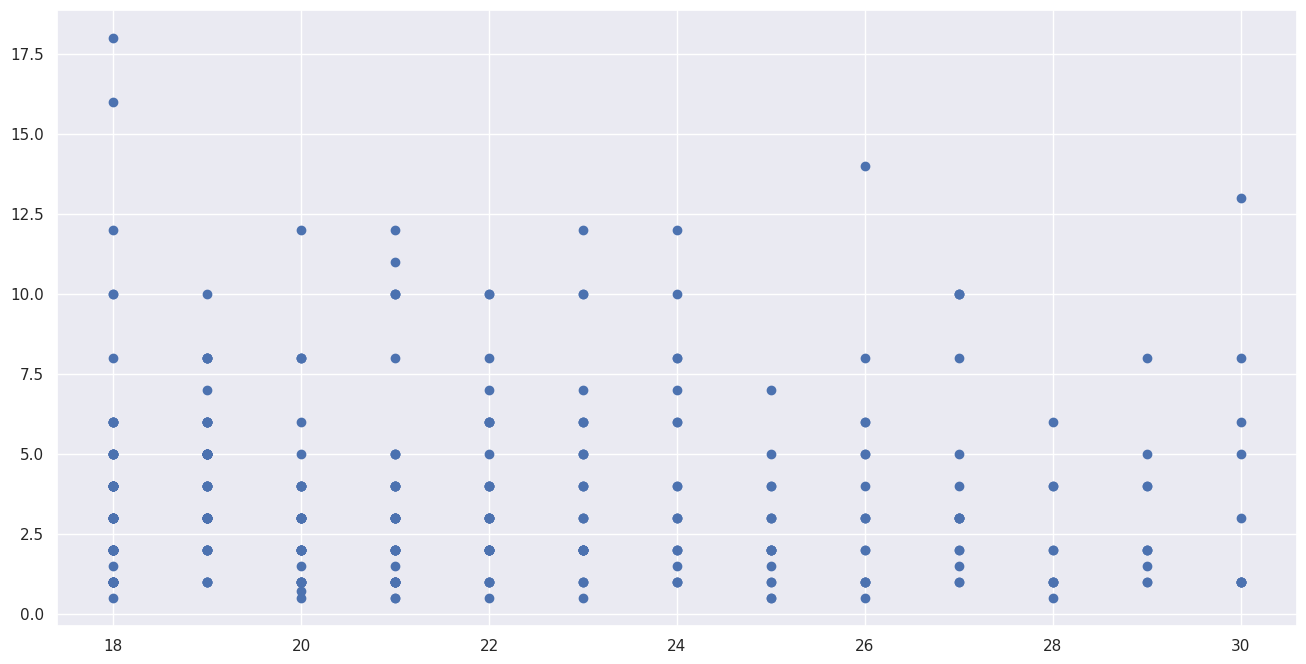

In [32]:
# Extract the Features from the Data
X = pd.DataFrame(df_clean[['Age','Hours per day']]) 
       
X                          
#Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Age", y = "Hours per day", data = X)   


In [33]:
# Import KMeans from sklearn.cluster
import warnings
warnings.filterwarnings("ignore",category=UserWarning,module="sklearn")
from sklearn.cluster import KMeans

# Guess the Number of Clusters
num_clust = 2

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,n_init=10)

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=2)

In [34]:
# Print the Cluster Centers
print("Features", "\tAge", "\tHours per day")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()

Features 	Age 	Hours per day

Cluster 0:	19.59	3.72	
Cluster 1:	25.72	3.68	


<AxesSubplot: xlabel='Cluster', ylabel='count'>

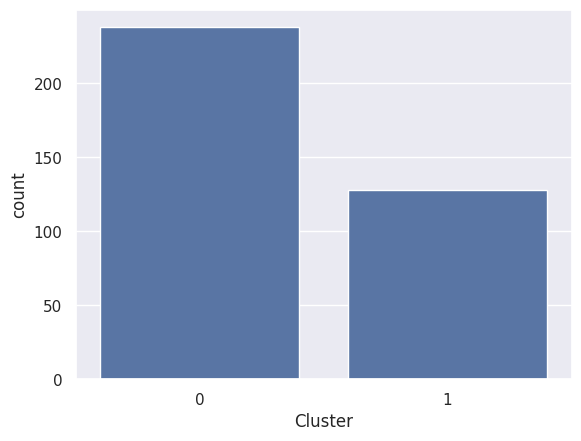

In [35]:
# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=X_labeled["Cluster"])

In [36]:
# Visualize the Clusters in the Data
#f, axes = plt.subplots(1, 1, figsize=(16,8))
#sc = plt.scatter(x = "Age", y = "Hours per day", c = "Cluster", cmap = 'viridis', data = X_labeled)
#legend = axes.legend(*sc.legend_elements(), loc="lower right", title="Classes")

In [37]:
# Print the Within Cluster Sum of Squares
#print("Within Cluster Sum of Squares :", kmeans.inertia_)

Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df_clean_freq_encoded_copy = df_clean_freq_encoded
df_clean_freq_encoded_copy.head()



,Hours per day,Fav genre,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects
2,4.0,Video game music,132.0,0,0,3,0,0,1,1,3,0,2,2,1,0,1,1,3,0
4,4.0,R&B,107.0,0,0,1,0,1,3,0,3,2,2,0,2,3,3,0,1,1
5,5.0,Jazz,86.0,1,2,0,0,0,2,3,3,1,3,1,3,3,3,3,0,1
6,3.0,Video game music,66.0,2,0,1,2,1,1,2,0,1,1,1,1,1,0,0,2,1
7,1.0,K pop,95.0,0,0,1,0,0,3,1,3,0,2,0,2,2,1,0,1,1




Random Forest Model Accuracy
Train Accuracy: 0.8828125
Test Accuracy: 0.6545454545454545


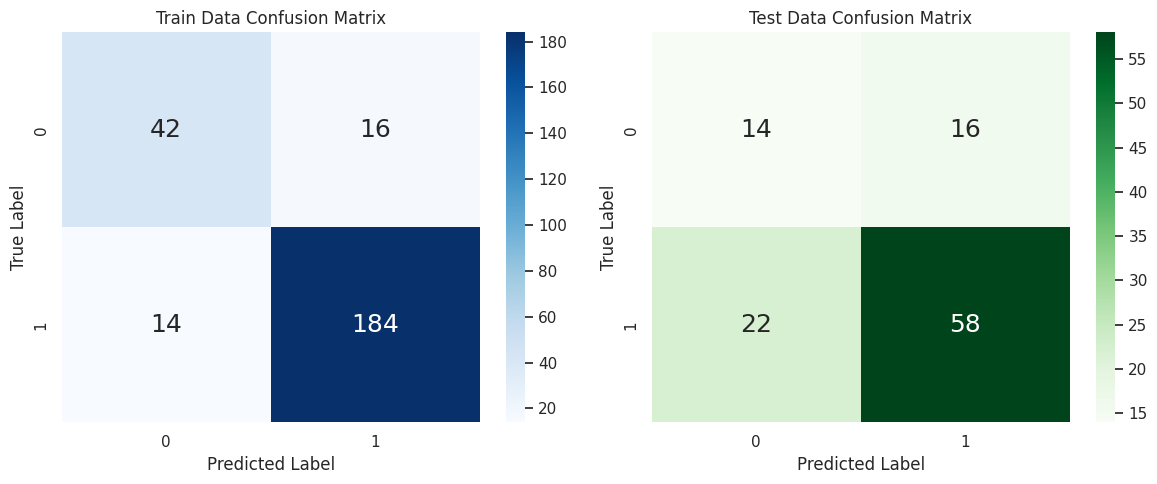

/tmp/ipykernel_926/1067936823.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


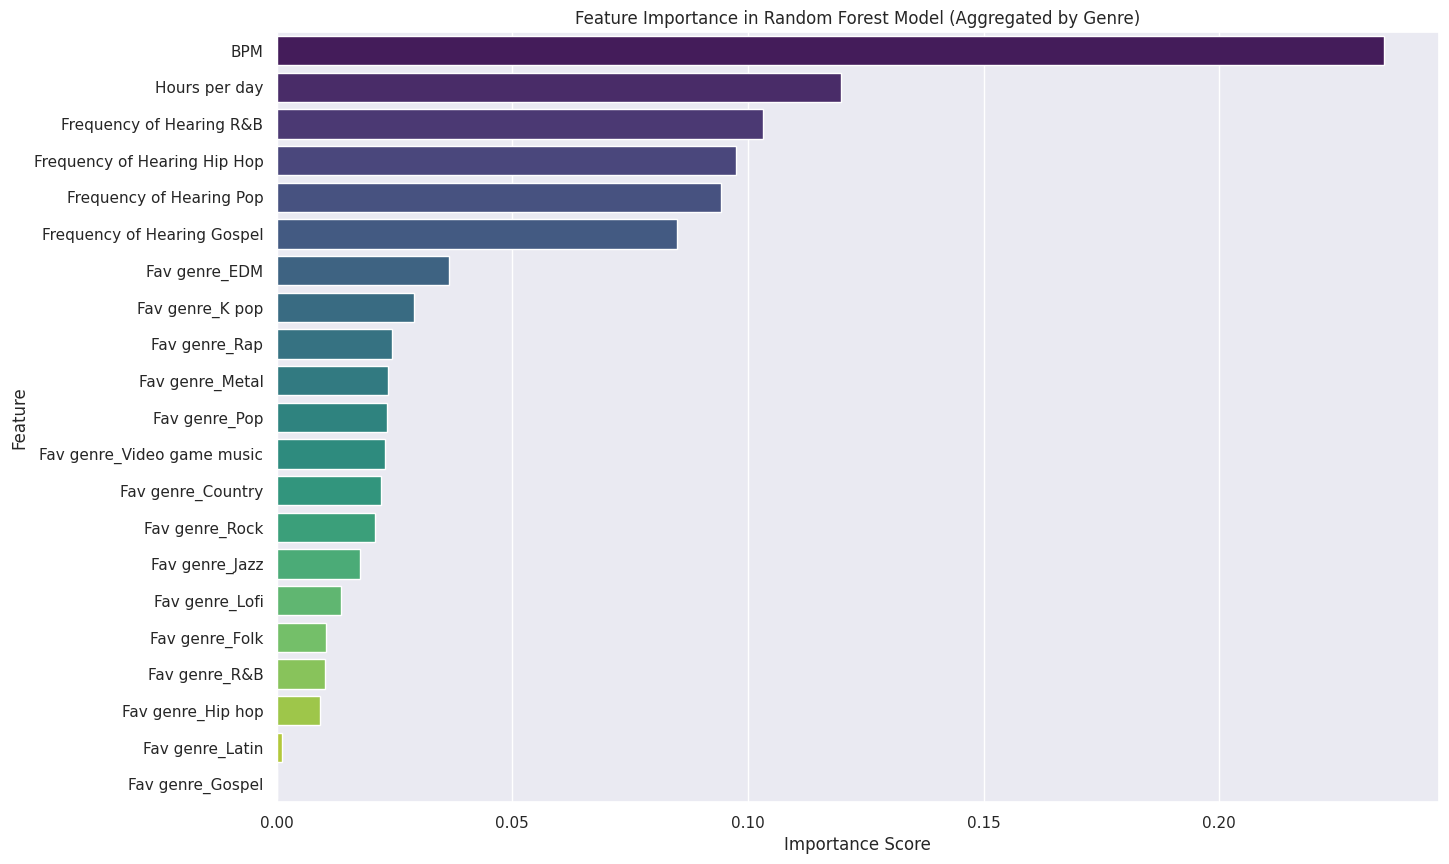

In [95]:
#Couldnt insightful conclusion from decision tree => therefore we shall try random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df_clean_freq_encoded_copy = df_clean_freq_encoded
df_clean_freq_encoded_copy = df_clean_freq_encoded_copy.drop(['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 
'Frequency [Metal]', 'Frequency [Video game music]'], axis = 1)

# Encoding all object (categorical) columns 
# Converts categorical data into numerical data that can be used in machine learning models.
df_clean_freq_encoded_copy = pd.get_dummies(df_clean_freq_encoded, drop_first=True)

# Combining all the frequency levels into one, making it more readable
# Basically combining all the sub categories into one for each genre
# "Classical_Rarely", "Classical_Sometimes", "Classical_Frequently", and "Classical_Never"-> "Classical"
for genre in ['Gospel', 'Hip hop','Pop', 'R&B']:
    df_clean_freq_encoded_copy[genre] = df_clean_freq_encoded_copy[[col for col in df_clean_freq_encoded_copy.columns if genre in col]].sum(axis=1)
    

# Drop the individual frequency columns now that they are aggregated
df_clean_freq_encoded_copy = df_clean_freq_encoded_copy.drop(columns=[col for col in df_clean_freq_encoded_copy.columns if 'Frequency' in col])

#Change the name of the factor:
df_clean_freq_encoded_copy.rename(columns={
    'Gospel': 'Frequency of Hearing Gospel',
    'Pop': 'Frequency of Hearing Pop',
    'Hip hop': 'Frequency of Hearing Hip Hop',
    'R&B': 'Frequency of Hearing R&B',
}, inplace=True)
# Redefine X and y with the fully encoded DataFrame
# Make music effect as what we want to test against
y = pd.DataFrame(df_clean_freq_encoded_copy['Music effects'])
X = df_clean_freq_encoded_copy.drop(columns=['Music effects'])  # Drop response variable from predictors

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest with custom weights
#rf_model = RandomForestClassifier(
#    n_estimators=200, 
#    max_depth=5, 
#    class_weight={0: 2, 1: 1},  # Custom weights
#    random_state=42
#)

#Define the Random Forest model
#Bigger number of trees = more accurate
rf_model = RandomForestClassifier(
    n_estimators=200,            # Number of trees (Decision tree)
    max_depth=5,                 # Control tree depth (Decision tree)
    class_weight='balanced',     # Handles class imbalance
    random_state=42              # For reproducibility
)


# Train the model
rf_model.fit(X_train, y_train.values.ravel()) 
# Use ravel() to avoid shape warning

# Predictions on Train and Test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Check accuracy on Train and Test data
#Using random forest model to accuracy
print("\n")
print("Random Forest Model Accuracy")
print("Train Accuracy:", rf_model.score(X_train, y_train))
print("Test Accuracy:", rf_model.score(X_test, y_test))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0],
           cmap="Blues")
axes[0].set_title("Train Data Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Testing Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1],
           cmap="Greens")
axes[1].set_title("Test Data Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

# Calculate feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(15, 10))
sb.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance in Random Forest Model (Aggregated by Genre)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show() 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6ce2d3cc-5396-454c-9fb0-db05823607ce' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>